In [1]:
import sys
sys.path.append("..")

#GPU configuration
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.Session(config=config)
set_session(sess)

import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scripts.data_generator as data_generator
import scripts.feature_ranking as feature_ranking
import scripts.features_2d as features_2d
import scripts.ga as ga
import scripts.cnn_models as cnn_models
import scripts.ga_evaluation as ga_evaluation
from IPython import get_ipython
from keras.backend.tensorflow_backend import set_session
from sklearn.metrics.cluster import adjusted_rand_score, silhouette_score
from tqdm import tqdm
import seaborn as sns
plt.ion()
plt.show()

random_state=4
random.seed( random_state )
np.random.seed(random_state)

%load_ext autoreload
%autoreload 2

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device



>> std 2
COV 0.30000000000000004 
ARI  1.0, std 2


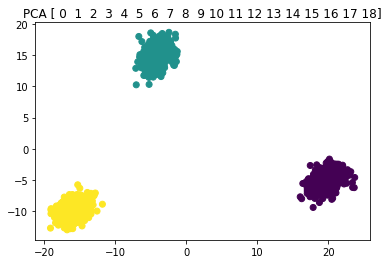

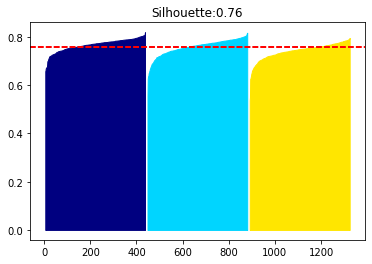

COV 0.30000000000000004 
ARI  1.0, std 2


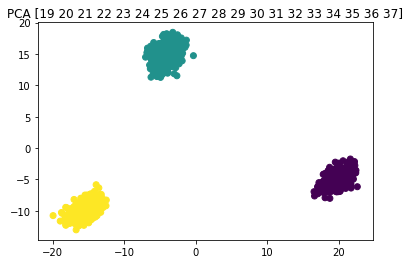

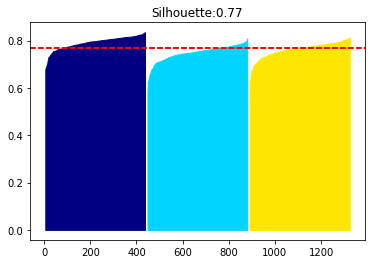

COV 0.30000000000000004 
ARI  1.0, std 2


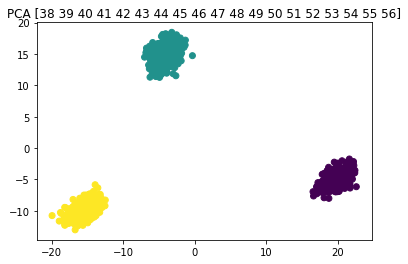

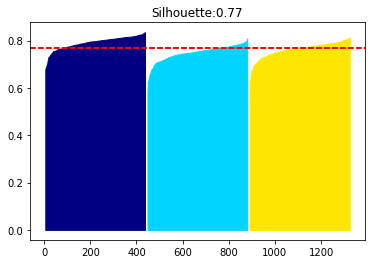

Total: (1300, 462), uniform (1300, 200) , normal (1300, 200),neg bin (1300, 0), gamma (1300, 0), moon (1300, 2), circle (1300, 2),  bimodal (1300, 0), redundat (1300, 5), outliers with uniform (1300, 0), outliers with normal (1300, 0) ,outlier binomial (1300, 0), beta features (1300, 0), 
*** Computing 1D feature ranking ...
Dispersion tests took 0.26 sec
Entropy computation 0.49 sec
KNN computation 0.01 sec
Sorting and thresholds 0.03 sec
Performing hierarchical clustering...
Hierarchical clustering 0.1 sec
Handle redundant features 0.02 sec
Returning 0 redundant features and  24 important features
*** Exploring 2D feature space with NN ...
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


trimming 757 to 231
handle_close_important (231, 3), total 757, 0.22211241722106934
relevant_features 270 => computing 1581 
trimming 1564 to 0
handle_important_features (231, 3),  total 1581, 0.22211241722106934
irrelevant_features 192 => computing 569
trimming 569 

  0%|          | 0/21 [00:00<?, ?it/s]

trimming 1365 to 462
handle_all_features (924, 3),  total 1373, 0.22211241722106934
Returning (924, 3), explored a total of 4280 feature pairs
*** Optimization algorithm 
Non redundant features 462, orig size 462, nb imp : 24
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [00:16<01:13,  4.31s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[5, 7, 8, 10, 14, 17, 24, 26, 27, 32, 33, 35, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.319251,21.0,"Counter({2: 434, 0: 433, 1: 433})"


Selecting (49, 4) from archive


 38%|███▊      | 8/21 [01:13<01:47,  8.27s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[5, 7, 8, 10, 14, 17, 24, 26, 27, 32, 33, 35, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.319251,21.0,"Counter({2: 434, 0: 433, 1: 433})"
1,"[0, 13, 16, 20, 29]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.303572,5.0,"Counter({2: 434, 0: 433, 1: 433})"


Selecting (33, 4) from archive


 57%|█████▋    | 12/21 [01:33<00:49,  5.47s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[5, 7, 8, 10, 14, 17, 24, 26, 27, 32, 33, 35, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.319251,21.0,"Counter({2: 434, 0: 433, 1: 433})"
1,"[0, 13, 16, 20, 29]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.303572,5.0,"Counter({2: 434, 0: 433, 1: 433})"
2,"[2, 9, 21, 28, 40]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.300024,5.0,"Counter({0: 436, 1: 436, 2: 428})"


Selecting (8, 4) from archive


 76%|███████▌  | 16/21 [01:56<00:25,  5.04s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[5, 7, 8, 10, 14, 17, 24, 26, 27, 32, 33, 35, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.319251,21.0,"Counter({2: 434, 0: 433, 1: 433})"
1,"[0, 13, 16, 20, 29]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.303572,5.0,"Counter({2: 434, 0: 433, 1: 433})"
2,"[2, 9, 21, 28, 40]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.300024,5.0,"Counter({0: 436, 1: 436, 2: 428})"
3,"[19, 38]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.307835,2.0,"Counter({1: 459, 0: 431, 2: 410})"


Selecting (22, 4) from archive


 95%|█████████▌| 20/21 [02:13<00:04,  4.28s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[5, 7, 8, 10, 14, 17, 24, 26, 27, 32, 33, 35, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.319251,21.0,"Counter({2: 434, 0: 433, 1: 433})"
1,"[0, 13, 16, 20, 29]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.303572,5.0,"Counter({2: 434, 0: 433, 1: 433})"
2,"[2, 9, 21, 28, 40]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.300024,5.0,"Counter({0: 436, 1: 436, 2: 428})"
3,"[19, 38]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.307835,2.0,"Counter({1: 459, 0: 431, 2: 410})"
4,"[1, 39]","[2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, ...",0.299919,2.0,"Counter({2: 437, 1: 433, 0: 430})"


Selecting (21, 4) from archive


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 462, orig size 462, nb imp : 24
['ARCHIVE2D', 'CLOSE', 'IMP1D', 'RANDOM'] [50 25 15 10] [0.5, 0.25, 0.15, 0.1]
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [00:25<01:53,  6.65s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.28838,"[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",48.0,"Counter({2: 434, 0: 433, 1: 433})"


Selecting (50, 4) from archive


 38%|███▊      | 8/21 [01:59<02:44, 12.62s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.288380,"[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",48.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.179422,"[176, 461]","[1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 0, ...",2.0,"Counter({0: 450, 1: 426, 2: 424})"


Selecting (1, 4) from archive


 57%|█████▋    | 12/21 [02:17<00:55,  6.15s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.288380,"[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",48.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.179422,"[176, 461]","[1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 0, ...",2.0,"Counter({0: 450, 1: 426, 2: 424})"
2,0.174473,"[381, 459]","[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, ...",2.0,"Counter({1: 733, 2: 340, 0: 227})"


Selecting (1, 4) from archive


 76%|███████▌  | 16/21 [02:33<00:22,  4.48s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.288380,"[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",48.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.179422,"[176, 461]","[1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 0, ...",2.0,"Counter({0: 450, 1: 426, 2: 424})"
2,0.174473,"[381, 459]","[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, ...",2.0,"Counter({1: 733, 2: 340, 0: 227})"
3,0.172892,"[141, 457]","[0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, ...",2.0,"Counter({0: 531, 1: 424, 2: 345})"


Selecting (3, 4) from archive


 95%|█████████▌| 20/21 [02:50<00:03,  4.00s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.288380,"[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",48.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.179422,"[176, 461]","[1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 0, ...",2.0,"Counter({0: 450, 1: 426, 2: 424})"
2,0.174473,"[381, 459]","[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, ...",2.0,"Counter({1: 733, 2: 340, 0: 227})"
3,0.172892,"[141, 457]","[0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, ...",2.0,"Counter({0: 531, 1: 424, 2: 345})"
4,0.181547,"[12, 50]","[0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, ...",2.0,"Counter({0: 560, 1: 434, 2: 306})"


Selecting (3, 4) from archive


100%|██████████| 21/21 [02:57<00:00,  8.47s/it]


,adapted_ratkowsky_lance,features,partition,size,structure
0,0.288380,"[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",48.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.179422,"[176, 461]","[1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 0, ...",2.0,"Counter({0: 450, 1: 426, 2: 424})"
2,0.174473,"[381, 459]","[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, ...",2.0,"Counter({1: 733, 2: 340, 0: 227})"
3,0.172892,"[141, 457]","[0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, ...",2.0,"Counter({0: 531, 1: 424, 2: 345})"
4,0.181547,"[12, 50]","[0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, ...",2.0,"Counter({0: 560, 1: 434, 2: 306})"


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 462, orig size 462, nb imp : 24
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [00:47<03:28, 12.26s/it]

,features,partition,silhouette,size,structure
0,"[5, 7, 8, 17, 26, 27, 35, 36, 45, 46, 54]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.848134,11.0,"Counter({2: 434, 0: 433, 1: 433})"


Selecting (47, 4) from archive


 38%|███▊      | 8/21 [01:48<02:50, 13.09s/it]

,features,partition,silhouette,size,structure
0,"[5, 7, 8, 17, 26, 27, 35, 36, 45, 46, 54]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.848134,11.0,"Counter({2: 434, 0: 433, 1: 433})"
1,"[16, 33, 52]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.827961,3.0,"Counter({2: 434, 0: 433, 1: 433})"


Selecting (16, 4) from archive


 57%|█████▋    | 12/21 [02:47<01:59, 13.30s/it]

,features,partition,silhouette,size,structure
0,"[5, 7, 8, 17, 26, 27, 35, 36, 45, 46, 54]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.848134,11.0,"Counter({2: 434, 0: 433, 1: 433})"
1,"[16, 33, 52]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.827961,3.0,"Counter({2: 434, 0: 433, 1: 433})"
2,"[21, 24, 40, 43, 55]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.804629,5.0,"Counter({1: 434, 0: 433, 2: 433})"


Selecting (34, 4) from archive


 76%|███████▌  | 16/21 [03:46<01:06, 13.27s/it]

,features,partition,silhouette,size,structure
0,"[5, 7, 8, 17, 26, 27, 35, 36, 45, 46, 54]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.848134,11.0,"Counter({2: 434, 0: 433, 1: 433})"
1,"[16, 33, 52]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.827961,3.0,"Counter({2: 434, 0: 433, 1: 433})"
2,"[21, 24, 40, 43, 55]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.804629,5.0,"Counter({1: 434, 0: 433, 2: 433})"
3,"[14, 39]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.784956,2.0,"Counter({1: 434, 0: 433, 2: 433})"


Selecting (26, 4) from archive


 95%|█████████▌| 20/21 [04:36<00:12, 12.64s/it]

,features,partition,silhouette,size,structure
0,"[5, 7, 8, 17, 26, 27, 35, 36, 45, 46, 54]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.848134,11.0,"Counter({2: 434, 0: 433, 1: 433})"
1,"[16, 33, 52]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.827961,3.0,"Counter({2: 434, 0: 433, 1: 433})"
2,"[21, 24, 40, 43, 55]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.804629,5.0,"Counter({1: 434, 0: 433, 2: 433})"
3,"[14, 39]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.784956,2.0,"Counter({1: 434, 0: 433, 2: 433})"
4,"[0, 1, 2, 9, 10, 13, 20, 28, 29, 32, 47, 48, 51]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.729580,13.0,"Counter({2: 434, 0: 433, 1: 433})"


Selecting (49, 4) from archive


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 462, orig size 462, nb imp : 24
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [00:52<03:48, 13.47s/it]

,adapted_silhouette,features,partition,size,structure
0,0.747431,"[0, 1, 2, 5, 7, 8, 9, 10, 13, 14, 16, 17, 19, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",41.0,"Counter({2: 434, 0: 433, 1: 433})"


Selecting (50, 4) from archive


 38%|███▊      | 8/21 [02:23<03:39, 16.91s/it]

,adapted_silhouette,features,partition,size,structure
0,0.747431,"[0, 1, 2, 5, 7, 8, 9, 10, 13, 14, 16, 17, 19, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",41.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.392342,"[12, 25, 44]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3.0,"Counter({2: 436, 1: 435, 0: 429})"


Selecting (3, 4) from archive


 57%|█████▋    | 12/21 [03:24<02:08, 14.29s/it]

,adapted_silhouette,features,partition,size,structure
0,0.747431,"[0, 1, 2, 5, 7, 8, 9, 10, 13, 14, 16, 17, 19, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",41.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.392342,"[12, 25, 44]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3.0,"Counter({2: 436, 1: 435, 0: 429})"
2,0.330481,"[381, 459]","[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, ...",2.0,"Counter({1: 733, 2: 340, 0: 227})"


Selecting (1, 4) from archive


 76%|███████▌  | 16/21 [04:20<01:07, 13.49s/it]

,adapted_silhouette,features,partition,size,structure
0,0.747431,"[0, 1, 2, 5, 7, 8, 9, 10, 13, 14, 16, 17, 19, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",41.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.392342,"[12, 25, 44]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3.0,"Counter({2: 436, 1: 435, 0: 429})"
2,0.330481,"[381, 459]","[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, ...",2.0,"Counter({1: 733, 2: 340, 0: 227})"
3,0.337705,"[4, 23, 37, 221]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.0,"Counter({1: 464, 0: 433, 2: 403})"


Selecting (16, 4) from archive


 95%|█████████▌| 20/21 [05:23<00:14, 14.01s/it]

,adapted_silhouette,features,partition,size,structure
0,0.747431,"[0, 1, 2, 5, 7, 8, 9, 10, 13, 14, 16, 17, 19, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",41.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.392342,"[12, 25, 44]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3.0,"Counter({2: 436, 1: 435, 0: 429})"
2,0.330481,"[381, 459]","[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, ...",2.0,"Counter({1: 733, 2: 340, 0: 227})"
3,0.337705,"[4, 23, 37, 221]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.0,"Counter({1: 464, 0: 433, 2: 403})"
4,0.354821,"[34, 53]","[2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 0, ...",2.0,"Counter({2: 597, 1: 390, 0: 313})"


Selecting (1, 4) from archive


100%|██████████| 21/21 [05:43<00:00, 16.38s/it]


COV 0.30000000000000004 
ARI  1.0, std 2


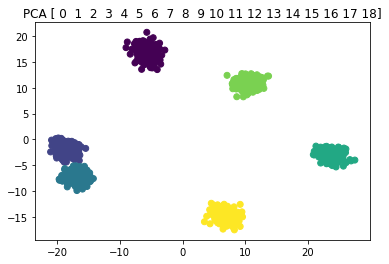

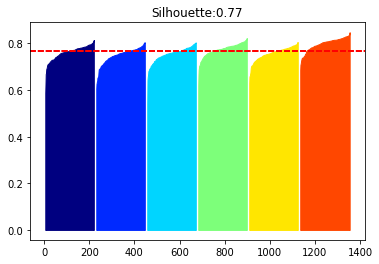

COV 0.30000000000000004 
ARI  1.0, std 2


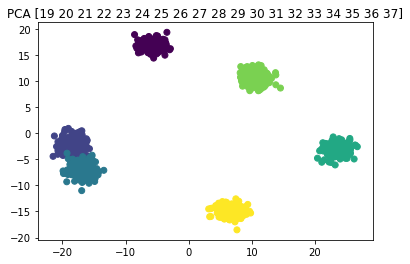

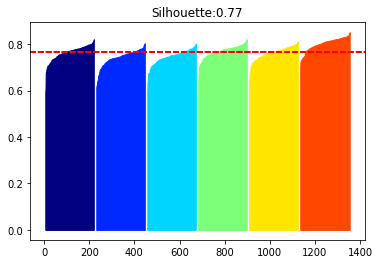

COV 0.30000000000000004 
ARI  1.0, std 2


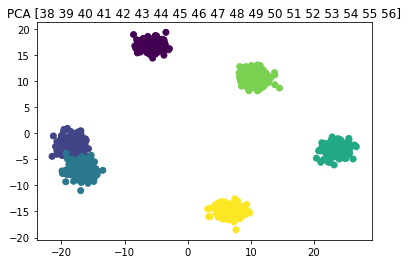

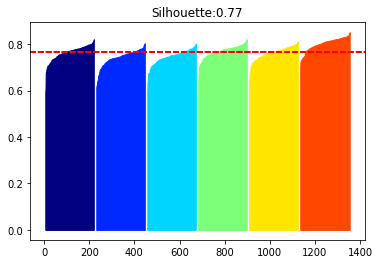

Total: (1300, 462), uniform (1300, 200) , normal (1300, 200),neg bin (1300, 0), gamma (1300, 0), moon (1300, 2), circle (1300, 2),  bimodal (1300, 0), redundat (1300, 5), outliers with uniform (1300, 0), outliers with normal (1300, 0) ,outlier binomial (1300, 0), beta features (1300, 0), 
*** Computing 1D feature ranking ...
Dispersion tests took 0.37 sec
Entropy computation 0.86 sec
KNN computation 0.01 sec
Sorting and thresholds 0.02 sec
Performing hierarchical clustering...
Hierarchical clustering 0.12 sec
Handle redundant features 0.04 sec
Returning 2 redundant features and  19 important features
*** Exploring 2D feature space with NN ...
handle_close_important (74, 3), total 786, 0.11612629145383835
relevant_features 277 => computing 1619 
trimming 1125 to 2
handle_important_features (76, 3),  total 1619, 0.11612629145383835
irrelevant_features 183 => computing 538
handle_not_important_features (85, 3), total 538, 0.11612629145383835
handle_all_features 460 => computing 1369


  0%|          | 0/21 [00:00<?, ?it/s]

handle_all_features (457, 3),  total 1369, 0.11612629145383835
Returning (457, 3), explored a total of 4312 feature pairs
*** Optimization algorithm 
Non redundant features 460, orig size 462, nb imp : 19
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [00:40<02:53, 10.19s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",0.155952,60.0,"Counter({2: 220, 4: 216, 0: 216, 3: 216, 1: 21..."


Selecting (50, 4) from archive


 38%|███▊      | 8/21 [04:33<06:32, 30.21s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",0.155952,60.0,"Counter({2: 220, 4: 216, 0: 216, 3: 216, 1: 21..."
1,"[139, 459]","[3, 4, 1, 0, 0, 1, 0, 1, 5, 4, 1, 5, 4, 1, 0, ...",0.156248,2.0,"Counter({1: 259, 0: 230, 3: 212, 4: 202, 2: 20..."


Selecting (2, 4) from archive


 57%|█████▋    | 12/21 [05:21<02:22, 15.89s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",0.155952,60.0,"Counter({2: 220, 4: 216, 0: 216, 3: 216, 1: 21..."
1,"[139, 459]","[3, 4, 1, 0, 0, 1, 0, 1, 5, 4, 1, 5, 4, 1, 0, ...",0.156248,2.0,"Counter({1: 259, 0: 230, 3: 212, 4: 202, 2: 20..."
2,"[107, 458]","[0, 4, 3, 1, 2, 0, 1, 2, 0, 2, 4, 1, 4, 1, 3, ...",0.155948,2.0,"Counter({3: 254, 4: 237, 1: 237, 5: 194, 0: 19..."


Selecting (2, 4) from archive


 76%|███████▌  | 16/21 [06:10<01:02, 12.59s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",0.155952,60.0,"Counter({2: 220, 4: 216, 0: 216, 3: 216, 1: 21..."
1,"[139, 459]","[3, 4, 1, 0, 0, 1, 0, 1, 5, 4, 1, 5, 4, 1, 0, ...",0.156248,2.0,"Counter({1: 259, 0: 230, 3: 212, 4: 202, 2: 20..."
2,"[107, 458]","[0, 4, 3, 1, 2, 0, 1, 2, 0, 2, 4, 1, 4, 1, 3, ...",0.155948,2.0,"Counter({3: 254, 4: 237, 1: 237, 5: 194, 0: 19..."
3,"[105, 461]","[5, 2, 1, 5, 1, 0, 2, 4, 1, 4, 0, 1, 4, 2, 1, ...",0.155700,2.0,"Counter({4: 275, 5: 246, 0: 235, 2: 198, 3: 18..."


Selecting (1, 4) from archive


 95%|█████████▌| 20/21 [06:57<00:11, 11.38s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",0.155952,60.0,"Counter({2: 220, 4: 216, 0: 216, 3: 216, 1: 21..."
1,"[139, 459]","[3, 4, 1, 0, 0, 1, 0, 1, 5, 4, 1, 5, 4, 1, 0, ...",0.156248,2.0,"Counter({1: 259, 0: 230, 3: 212, 4: 202, 2: 20..."
2,"[107, 458]","[0, 4, 3, 1, 2, 0, 1, 2, 0, 2, 4, 1, 4, 1, 3, ...",0.155948,2.0,"Counter({3: 254, 4: 237, 1: 237, 5: 194, 0: 19..."
3,"[105, 461]","[5, 2, 1, 5, 1, 0, 2, 4, 1, 4, 0, 1, 4, 2, 1, ...",0.155700,2.0,"Counter({4: 275, 5: 246, 0: 235, 2: 198, 3: 18..."
4,"[74, 81]","[4, 5, 3, 0, 3, 3, 1, 2, 1, 4, 1, 3, 1, 3, 4, ...",0.137888,2.0,"Counter({3: 268, 0: 235, 4: 221, 1: 216, 5: 19..."


Selecting (3, 4) from archive


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 460, orig size 462, nb imp : 19
['ARCHIVE2D', 'CLOSE', 'IMP1D', 'RANDOM'] [50 25 15 10] [0.5, 0.25, 0.15, 0.1]
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [00:48<03:32, 12.48s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.146228,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",63.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."


Selecting (50, 4) from archive


 38%|███▊      | 8/21 [04:57<07:00, 32.37s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.146228,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",63.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."
1,0.102471,"[63, 139, 459]","[4, 0, 5, 0, 4, 5, 4, 4, 5, 2, 5, 5, 0, 1, 4, ...",3.0,"Counter({4: 237, 5: 230, 3: 220, 0: 206, 2: 20..."


Selecting (2, 4) from archive


 57%|█████▋    | 12/21 [05:42<02:18, 15.43s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.146228,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",63.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."
1,0.102471,"[63, 139, 459]","[4, 0, 5, 0, 4, 5, 4, 4, 5, 2, 5, 5, 0, 1, 4, ...",3.0,"Counter({4: 237, 5: 230, 3: 220, 0: 206, 2: 20..."
2,0.101125,"[65, 107, 458]","[0, 2, 5, 2, 1, 0, 1, 5, 0, 1, 2, 2, 3, 3, 5, ...",3.0,"Counter({1: 276, 5: 243, 2: 232, 0: 208, 4: 17..."


Selecting (2, 4) from archive


 76%|███████▌  | 16/21 [06:27<00:54, 10.92s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.146228,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",63.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."
1,0.102471,"[63, 139, 459]","[4, 0, 5, 0, 4, 5, 4, 4, 5, 2, 5, 5, 0, 1, 4, ...",3.0,"Counter({4: 237, 5: 230, 3: 220, 0: 206, 2: 20..."
2,0.101125,"[65, 107, 458]","[0, 2, 5, 2, 1, 0, 1, 5, 0, 1, 2, 2, 3, 3, 5, ...",3.0,"Counter({1: 276, 5: 243, 2: 232, 0: 208, 4: 17..."
3,0.101087,"[79, 105, 461]","[0, 4, 2, 2, 1, 0, 3, 4, 1, 3, 0, 1, 4, 3, 1, ...",3.0,"Counter({0: 241, 4: 236, 2: 224, 5: 215, 1: 19..."


Selecting (1, 4) from archive


 95%|█████████▌| 20/21 [07:07<00:09,  9.68s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.146228,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",63.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."
1,0.102471,"[63, 139, 459]","[4, 0, 5, 0, 4, 5, 4, 4, 5, 2, 5, 5, 0, 1, 4, ...",3.0,"Counter({4: 237, 5: 230, 3: 220, 0: 206, 2: 20..."
2,0.101125,"[65, 107, 458]","[0, 2, 5, 2, 1, 0, 1, 5, 0, 1, 2, 2, 3, 3, 5, ...",3.0,"Counter({1: 276, 5: 243, 2: 232, 0: 208, 4: 17..."
3,0.101087,"[79, 105, 461]","[0, 4, 2, 2, 1, 0, 3, 4, 1, 3, 0, 1, 4, 3, 1, ...",3.0,"Counter({0: 241, 4: 236, 2: 224, 5: 215, 1: 19..."
4,0.083158,"[67, 83, 153]","[3, 3, 1, 2, 3, 0, 2, 2, 2, 2, 2, 2, 5, 0, 3, ...",3.0,"Counter({4: 261, 1: 237, 3: 216, 2: 213, 0: 18..."


Selecting (12, 4) from archive


100%|██████████| 21/21 [07:22<00:00, 21.07s/it]


,adapted_ratkowsky_lance,features,partition,size,structure
0,0.146228,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",63.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."
1,0.102471,"[63, 139, 459]","[4, 0, 5, 0, 4, 5, 4, 4, 5, 2, 5, 5, 0, 1, 4, ...",3.0,"Counter({4: 237, 5: 230, 3: 220, 0: 206, 2: 20..."
2,0.101125,"[65, 107, 458]","[0, 2, 5, 2, 1, 0, 1, 5, 0, 1, 2, 2, 3, 3, 5, ...",3.0,"Counter({1: 276, 5: 243, 2: 232, 0: 208, 4: 17..."
3,0.101087,"[79, 105, 461]","[0, 4, 2, 2, 1, 0, 3, 4, 1, 3, 0, 1, 4, 3, 1, ...",3.0,"Counter({0: 241, 4: 236, 2: 224, 5: 215, 1: 19..."
4,0.083158,"[67, 83, 153]","[3, 3, 1, 2, 3, 0, 2, 2, 2, 2, 2, 2, 5, 0, 3, ...",3.0,"Counter({4: 261, 1: 237, 3: 216, 2: 213, 0: 18..."


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 460, orig size 462, nb imp : 19
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [00:53<03:57, 13.97s/it]

,features,partition,silhouette,size,structure
0,"[0, 1, 2, 3, 4, 7, 8, 9, 11, 13, 14, 15, 16, 1...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.781167,37.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."


Selecting (50, 4) from archive


 38%|███▊      | 8/21 [02:25<03:45, 17.35s/it]

,features,partition,silhouette,size,structure
0,"[0, 1, 2, 3, 4, 7, 8, 9, 11, 13, 14, 15, 16, 1...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.781167,37.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."
1,"[32, 37, 38, 45]","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.721874,4.0,"Counter({4: 220, 2: 216, 0: 216, 5: 216, 1: 21..."


Selecting (24, 4) from archive


 57%|█████▋    | 12/21 [03:31<02:19, 15.52s/it]

,features,partition,silhouette,size,structure
0,"[0, 1, 2, 3, 4, 7, 8, 9, 11, 13, 14, 15, 16, 1...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.781167,37.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."
1,"[32, 37, 38, 45]","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.721874,4.0,"Counter({4: 220, 2: 216, 0: 216, 5: 216, 1: 21..."
2,"[5, 19, 24, 42, 51, 457]","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",0.645137,6.0,"Counter({0: 432, 2: 220, 3: 216, 4: 216, 5: 13..."


Selecting (29, 4) from archive


 76%|███████▌  | 16/21 [04:43<01:17, 15.46s/it]

,features,partition,silhouette,size,structure
0,"[0, 1, 2, 3, 4, 7, 8, 9, 11, 13, 14, 15, 16, 1...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.781167,37.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."
1,"[32, 37, 38, 45]","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.721874,4.0,"Counter({4: 220, 2: 216, 0: 216, 5: 216, 1: 21..."
2,"[5, 19, 24, 42, 51, 457]","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",0.645137,6.0,"Counter({0: 432, 2: 220, 3: 216, 4: 216, 5: 13..."
3,"[6, 12, 23, 36, 55]","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",0.653050,5.0,"Counter({5: 220, 4: 216, 0: 216, 3: 216, 1: 21..."


Selecting (30, 4) from archive


 95%|█████████▌| 20/21 [05:54<00:15, 15.49s/it]

,features,partition,silhouette,size,structure
0,"[0, 1, 2, 3, 4, 7, 8, 9, 11, 13, 14, 15, 16, 1...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.781167,37.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."
1,"[32, 37, 38, 45]","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.721874,4.0,"Counter({4: 220, 2: 216, 0: 216, 5: 216, 1: 21..."
2,"[5, 19, 24, 42, 51, 457]","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",0.645137,6.0,"Counter({0: 432, 2: 220, 3: 216, 4: 216, 5: 13..."
3,"[6, 12, 23, 36, 55]","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",0.653050,5.0,"Counter({5: 220, 4: 216, 0: 216, 3: 216, 1: 21..."
4,"[25, 44]","[2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, ...",0.564506,2.0,"Counter({3: 242, 5: 231, 2: 224, 1: 205, 4: 20..."


Selecting (2, 4) from archive


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 460, orig size 462, nb imp : 19
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [00:57<04:11, 14.77s/it]

,adapted_silhouette,features,partition,size,structure
0,0.749006,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",59.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."


Selecting (50, 4) from archive


 38%|███▊      | 8/21 [02:43<04:11, 19.33s/it]

,adapted_silhouette,features,partition,size,structure
0,0.749006,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",59.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."
1,0.271070,"[107, 458]","[0, 4, 3, 1, 2, 0, 1, 2, 0, 2, 4, 1, 4, 1, 3, ...",2.0,"Counter({3: 254, 4: 237, 1: 237, 5: 194, 0: 19..."


Selecting (3, 4) from archive


 57%|█████▋    | 12/21 [03:44<02:19, 15.45s/it]

,adapted_silhouette,features,partition,size,structure
0,0.749006,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",59.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."
1,0.271070,"[107, 458]","[0, 4, 3, 1, 2, 0, 1, 2, 0, 2, 4, 1, 4, 1, 3, ...",2.0,"Counter({3: 254, 4: 237, 1: 237, 5: 194, 0: 19..."
2,0.266675,"[57, 139, 459]","[0, 5, 2, 4, 4, 0, 4, 0, 1, 5, 1, 1, 5, 2, 4, ...",3.0,"Counter({0: 247, 5: 235, 1: 227, 2: 199, 3: 19..."


Selecting (1, 4) from archive


 76%|███████▌  | 16/21 [04:50<01:13, 14.78s/it]

,adapted_silhouette,features,partition,size,structure
0,0.749006,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",59.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."
1,0.271070,"[107, 458]","[0, 4, 3, 1, 2, 0, 1, 2, 0, 2, 4, 1, 4, 1, 3, ...",2.0,"Counter({3: 254, 4: 237, 1: 237, 5: 194, 0: 19..."
2,0.266675,"[57, 139, 459]","[0, 5, 2, 4, 4, 0, 4, 0, 1, 5, 1, 1, 5, 2, 4, ...",3.0,"Counter({0: 247, 5: 235, 1: 227, 2: 199, 3: 19..."
3,0.258363,"[105, 150, 461]","[5, 1, 4, 4, 2, 0, 3, 3, 4, 3, 0, 4, 1, 3, 2, ...",3.0,"Counter({0: 246, 2: 242, 1: 238, 4: 218, 5: 19..."


Selecting (1, 4) from archive


 95%|█████████▌| 20/21 [05:55<00:14, 14.36s/it]

,adapted_silhouette,features,partition,size,structure
0,0.749006,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",59.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."
1,0.271070,"[107, 458]","[0, 4, 3, 1, 2, 0, 1, 2, 0, 2, 4, 1, 4, 1, 3, ...",2.0,"Counter({3: 254, 4: 237, 1: 237, 5: 194, 0: 19..."
2,0.266675,"[57, 139, 459]","[0, 5, 2, 4, 4, 0, 4, 0, 1, 5, 1, 1, 5, 2, 4, ...",3.0,"Counter({0: 247, 5: 235, 1: 227, 2: 199, 3: 19..."
3,0.258363,"[105, 150, 461]","[5, 1, 4, 4, 2, 0, 3, 3, 4, 3, 0, 4, 1, 3, 2, ...",3.0,"Counter({0: 246, 2: 242, 1: 238, 4: 218, 5: 19..."
4,0.260386,"[208, 250]","[2, 3, 1, 5, 4, 0, 5, 0, 4, 4, 4, 2, 0, 4, 5, ...",2.0,"Counter({5: 279, 2: 260, 3: 210, 1: 202, 0: 20..."


Selecting (6, 4) from archive


100%|██████████| 21/21 [06:15<00:00, 17.86s/it]


COV 0.30000000000000004 
ARI  1.0, std 2


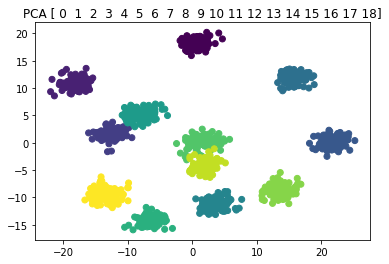

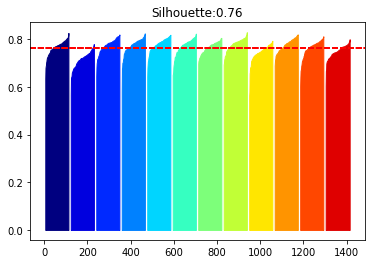

COV 0.30000000000000004 
ARI  1.0, std 2


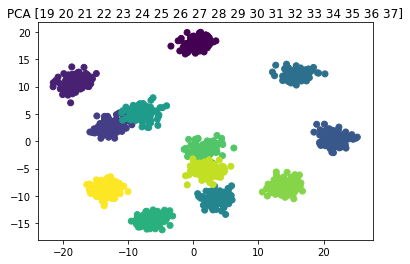

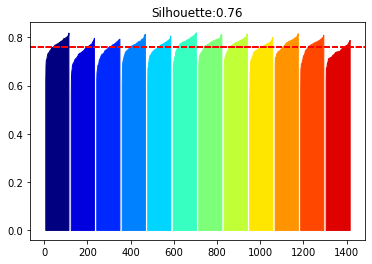

COV 0.30000000000000004 
ARI  1.0, std 2


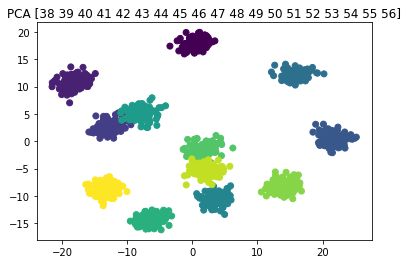

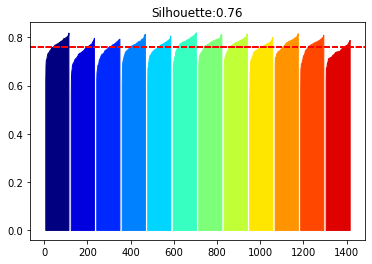

Total: (1300, 462), uniform (1300, 200) , normal (1300, 200),neg bin (1300, 0), gamma (1300, 0), moon (1300, 2), circle (1300, 2),  bimodal (1300, 0), redundat (1300, 5), outliers with uniform (1300, 0), outliers with normal (1300, 0) ,outlier binomial (1300, 0), beta features (1300, 0), 
*** Computing 1D feature ranking ...
Dispersion tests took 0.27 sec
Entropy computation 0.5 sec
KNN computation 0.01 sec
Sorting and thresholds 0.02 sec
Performing hierarchical clustering...
Hierarchical clustering 0.08 sec
Handle redundant features 0.02 sec
Returning 1 redundant features and  18 important features
*** Exploring 2D feature space with NN ...
handle_close_important (0, 3), total 797, nan
relevant_features 282 => computing 1646 
handle_important_features (0, 3),  total 1646, nan
irrelevant_features 179 => computing 530
handle_not_important_features (0, 3), total 530, nan
handle_all_features 461 => computing 1367


  0%|          | 0/21 [00:00<?, ?it/s]

handle_all_features (0, 3),  total 1367, nan
Returning (0, 3), explored a total of 4340 feature pairs
*** Optimization algorithm 
Non redundant features 461, orig size 462, nb imp : 18
adding 50 random population


 19%|█▉        | 4/21 [00:48<03:30, 12.41s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 1, 2, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 1...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.074574,46.0,"Counter({6: 112, 5: 108, 10: 108, 0: 108, 8: 1..."


adding 28 random population


 38%|███▊      | 8/21 [05:29<08:31, 39.37s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 1, 2, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 1...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.074574,46.0,"Counter({6: 112, 5: 108, 10: 108, 0: 108, 8: 1..."
1,"[4, 23, 42, 66]","[8, 5, 3, 3, 5, 5, 3, 3, 3, 5, 5, 5, 5, 5, 8, ...",0.076835,4.0,"Counter({3: 165, 6: 156, 1: 141, 2: 121, 8: 11..."


adding 3 random population


 57%|█████▋    | 12/21 [07:31<04:28, 29.83s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 1, 2, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 1...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.074574,46.0,"Counter({6: 112, 5: 108, 10: 108, 0: 108, 8: 1..."
1,"[4, 23, 42, 66]","[8, 5, 3, 3, 5, 5, 3, 3, 3, 5, 5, 5, 5, 5, 8, ...",0.076835,4.0,"Counter({3: 165, 6: 156, 1: 141, 2: 121, 8: 11..."
2,"[3, 11, 16, 18, 22, 31, 35, 37, 41, 49, 54, 56]","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...",0.079362,12.0,"Counter({9: 112, 7: 108, 10: 108, 0: 108, 2: 1..."


adding 14 random population


 76%|███████▌  | 16/21 [10:36<02:53, 34.68s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 1, 2, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 1...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.074574,46.0,"Counter({6: 112, 5: 108, 10: 108, 0: 108, 8: 1..."
1,"[4, 23, 42, 66]","[8, 5, 3, 3, 5, 5, 3, 3, 3, 5, 5, 5, 5, 5, 8, ...",0.076835,4.0,"Counter({3: 165, 6: 156, 1: 141, 2: 121, 8: 11..."
2,"[3, 11, 16, 18, 22, 31, 35, 37, 41, 49, 54, 56]","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...",0.079362,12.0,"Counter({9: 112, 7: 108, 10: 108, 0: 108, 2: 1..."
3,"[109, 192]","[10, 7, 2, 4, 1, 0, 8, 5, 7, 3, 8, 10, 6, 5, 1...",0.076468,2.0,"Counter({3: 135, 7: 131, 4: 130, 2: 126, 8: 11..."


adding 5 random population


 95%|█████████▌| 20/21 [12:15<00:25, 25.94s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 1, 2, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 1...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.074574,46.0,"Counter({6: 112, 5: 108, 10: 108, 0: 108, 8: 1..."
1,"[4, 23, 42, 66]","[8, 5, 3, 3, 5, 5, 3, 3, 3, 5, 5, 5, 5, 5, 8, ...",0.076835,4.0,"Counter({3: 165, 6: 156, 1: 141, 2: 121, 8: 11..."
2,"[3, 11, 16, 18, 22, 31, 35, 37, 41, 49, 54, 56]","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...",0.079362,12.0,"Counter({9: 112, 7: 108, 10: 108, 0: 108, 2: 1..."
3,"[109, 192]","[10, 7, 2, 4, 1, 0, 8, 5, 7, 3, 8, 10, 6, 5, 1...",0.076468,2.0,"Counter({3: 135, 7: 131, 4: 130, 2: 126, 8: 11..."
4,"[59, 76]","[2, 6, 3, 8, 3, 5, 2, 2, 7, 11, 0, 4, 1, 6, 5,...",0.076401,2.0,"Counter({9: 142, 4: 137, 11: 125, 8: 119, 2: 1..."


adding 3 random population


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 461, orig size 462, nb imp : 18
['ARCHIVE2D', 'CLOSE', 'IMP1D', 'RANDOM'] [50 25 15 10] [0.5, 0.25, 0.15, 0.1]
adding 50 random population


 19%|█▉        | 4/21 [01:18<05:45, 20.31s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.068426,"[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...",55.0,"Counter({9: 112, 11: 108, 6: 108, 0: 108, 2: 1..."


adding 44 random population


 38%|███▊      | 8/21 [05:15<07:15, 33.52s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.068426,"[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...",55.0,"Counter({9: 112, 11: 108, 6: 108, 0: 108, 2: 1..."
1,0.045208,"[57, 121, 133, 142, 459]","[2, 5, 4, 2, 10, 0, 3, 8, 10, 11, 10, 6, 7, 6,...",5.0,"Counter({4: 134, 3: 134, 7: 131, 6: 122, 10: 1..."


adding 4 random population


 57%|█████▋    | 12/21 [07:12<03:53, 25.98s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.068426,"[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...",55.0,"Counter({9: 112, 11: 108, 6: 108, 0: 108, 2: 1..."
1,0.045208,"[57, 121, 133, 142, 459]","[2, 5, 4, 2, 10, 0, 3, 8, 10, 11, 10, 6, 7, 6,...",5.0,"Counter({4: 134, 3: 134, 7: 131, 6: 122, 10: 1..."
2,0.045589,"[2, 21, 40, 47, 59, 148, 225, 457, 460]","[4, 11, 5, 6, 7, 4, 4, 6, 7, 11, 5, 7, 11, 11,...",9.0,"Counter({1: 261, 8: 137, 11: 116, 5: 108, 0: 1..."


adding 2 random population


 76%|███████▌  | 16/21 [08:54<01:45, 21.19s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.068426,"[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...",55.0,"Counter({9: 112, 11: 108, 6: 108, 0: 108, 2: 1..."
1,0.045208,"[57, 121, 133, 142, 459]","[2, 5, 4, 2, 10, 0, 3, 8, 10, 11, 10, 6, 7, 6,...",5.0,"Counter({4: 134, 3: 134, 7: 131, 6: 122, 10: 1..."
2,0.045589,"[2, 21, 40, 47, 59, 148, 225, 457, 460]","[4, 11, 5, 6, 7, 4, 4, 6, 7, 11, 5, 7, 11, 11,...",9.0,"Counter({1: 261, 8: 137, 11: 116, 5: 108, 0: 1..."
3,0.045390,"[58, 89, 96, 204, 458]","[8, 7, 7, 0, 6, 10, 10, 3, 9, 7, 1, 5, 3, 10, ...",5.0,"Counter({8: 133, 6: 127, 3: 127, 5: 127, 4: 11..."


adding 3 random population


 95%|█████████▌| 20/21 [10:05<00:16, 16.61s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.068426,"[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...",55.0,"Counter({9: 112, 11: 108, 6: 108, 0: 108, 2: 1..."
1,0.045208,"[57, 121, 133, 142, 459]","[2, 5, 4, 2, 10, 0, 3, 8, 10, 11, 10, 6, 7, 6,...",5.0,"Counter({4: 134, 3: 134, 7: 131, 6: 122, 10: 1..."
2,0.045589,"[2, 21, 40, 47, 59, 148, 225, 457, 460]","[4, 11, 5, 6, 7, 4, 4, 6, 7, 11, 5, 7, 11, 11,...",9.0,"Counter({1: 261, 8: 137, 11: 116, 5: 108, 0: 1..."
3,0.045390,"[58, 89, 96, 204, 458]","[8, 7, 7, 0, 6, 10, 10, 3, 9, 7, 1, 5, 3, 10, ...",5.0,"Counter({8: 133, 6: 127, 3: 127, 5: 127, 4: 11..."
4,0.043126,"[41, 66, 76, 99]","[8, 1, 4, 5, 8, 1, 7, 7, 10, 2, 7, 2, 1, 1, 8,...",4.0,"Counter({7: 196, 10: 190, 1: 143, 6: 143, 3: 1..."


adding 1 random population


100%|██████████| 21/21 [10:41<00:00, 30.54s/it]


,adapted_ratkowsky_lance,features,partition,size,structure
0,0.068426,"[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1...",55.0,"Counter({9: 112, 11: 108, 6: 108, 0: 108, 2: 1..."
1,0.045208,"[57, 121, 133, 142, 459]","[2, 5, 4, 2, 10, 0, 3, 8, 10, 11, 10, 6, 7, 6,...",5.0,"Counter({4: 134, 3: 134, 7: 131, 6: 122, 10: 1..."
2,0.045589,"[2, 21, 40, 47, 59, 148, 225, 457, 460]","[4, 11, 5, 6, 7, 4, 4, 6, 7, 11, 5, 7, 11, 11,...",9.0,"Counter({1: 261, 8: 137, 11: 116, 5: 108, 0: 1..."
3,0.045390,"[58, 89, 96, 204, 458]","[8, 7, 7, 0, 6, 10, 10, 3, 9, 7, 1, 5, 3, 10, ...",5.0,"Counter({8: 133, 6: 127, 3: 127, 5: 127, 4: 11..."
4,0.043126,"[41, 66, 76, 99]","[8, 1, 4, 5, 8, 1, 7, 7, 10, 2, 7, 2, 1, 1, 8,...",4.0,"Counter({7: 196, 10: 190, 1: 143, 6: 143, 3: 1..."


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 461, orig size 462, nb imp : 18
adding 50 random population


 19%|█▉        | 4/21 [01:27<06:18, 22.28s/it]

,features,partition,silhouette,size,structure
0,"[1, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 1...","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...",0.757557,47.0,"Counter({8: 112, 7: 108, 6: 108, 0: 108, 5: 10..."


adding 32 random population


 38%|███▊      | 8/21 [03:58<06:04, 28.05s/it]

,features,partition,silhouette,size,structure
0,"[1, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 1...","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...",0.757557,47.0,"Counter({8: 112, 7: 108, 6: 108, 0: 108, 5: 10..."
1,"[18, 38, 55]","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.566038,3.0,"Counter({1: 157, 3: 113, 6: 109, 11: 109, 4: 1..."


adding 10 random population


 57%|█████▋    | 12/21 [05:31<03:27, 23.10s/it]

,features,partition,silhouette,size,structure
0,"[1, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 1...","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...",0.757557,47.0,"Counter({8: 112, 7: 108, 6: 108, 0: 108, 5: 10..."
1,"[18, 38, 55]","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.566038,3.0,"Counter({1: 157, 3: 113, 6: 109, 11: 109, 4: 1..."
2,"[37, 56]","[6, 10, 10, 10, 10, 0, 6, 6, 3, 10, 10, 3, 6, ...",0.533363,2.0,"Counter({0: 180, 1: 166, 5: 165, 9: 158, 7: 13..."


adding 6 random population


 76%|███████▌  | 16/21 [06:57<01:44, 20.97s/it]

,features,partition,silhouette,size,structure
0,"[1, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 1...","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...",0.757557,47.0,"Counter({8: 112, 7: 108, 6: 108, 0: 108, 5: 10..."
1,"[18, 38, 55]","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.566038,3.0,"Counter({1: 157, 3: 113, 6: 109, 11: 109, 4: 1..."
2,"[37, 56]","[6, 10, 10, 10, 10, 0, 6, 6, 3, 10, 10, 3, 6, ...",0.533363,2.0,"Counter({0: 180, 1: 166, 5: 165, 9: 158, 7: 13..."
3,"[22, 247]","[8, 5, 7, 8, 0, 8, 0, 8, 7, 0, 8, 5, 5, 8, 0, ...",0.397699,2.0,"Counter({8: 169, 5: 167, 1: 139, 9: 124, 7: 11..."


adding 2 random population


 95%|█████████▌| 20/21 [08:24<00:20, 20.50s/it]

,features,partition,silhouette,size,structure
0,"[1, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 1...","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...",0.757557,47.0,"Counter({8: 112, 7: 108, 6: 108, 0: 108, 5: 10..."
1,"[18, 38, 55]","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.566038,3.0,"Counter({1: 157, 3: 113, 6: 109, 11: 109, 4: 1..."
2,"[37, 56]","[6, 10, 10, 10, 10, 0, 6, 6, 3, 10, 10, 3, 6, ...",0.533363,2.0,"Counter({0: 180, 1: 166, 5: 165, 9: 158, 7: 13..."
3,"[22, 247]","[8, 5, 7, 8, 0, 8, 0, 8, 7, 0, 8, 5, 5, 8, 0, ...",0.397699,2.0,"Counter({8: 169, 5: 167, 1: 139, 9: 124, 7: 11..."
4,"[0, 118]","[10, 3, 10, 5, 5, 5, 3, 5, 5, 5, 5, 10, 10, 3,...",0.373051,2.0,"Counter({8: 153, 6: 146, 2: 143, 1: 136, 0: 12..."


adding 7 random population


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 461, orig size 462, nb imp : 18
adding 50 random population


 19%|█▉        | 4/21 [01:46<07:33, 26.69s/it]

,adapted_silhouette,features,partition,size,structure
0,0.748074,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",56.0,"Counter({9: 112, 10: 108, 6: 108, 0: 108, 8: 1..."


adding 44 random population


 38%|███▊      | 8/21 [04:37<06:52, 31.70s/it]

,adapted_silhouette,features,partition,size,structure
0,0.748074,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",56.0,"Counter({9: 112, 10: 108, 6: 108, 0: 108, 8: 1..."
1,0.238763,"[106, 159]","[6, 7, 10, 2, 1, 2, 10, 5, 4, 3, 3, 7, 4, 10, ...",2.0,"Counter({6: 141, 5: 130, 10: 122, 2: 115, 8: 1..."


adding 1 random population


 57%|█████▋    | 12/21 [06:40<04:25, 29.46s/it]

,adapted_silhouette,features,partition,size,structure
0,0.748074,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",56.0,"Counter({9: 112, 10: 108, 6: 108, 0: 108, 8: 1..."
1,0.238763,"[106, 159]","[6, 7, 10, 2, 1, 2, 10, 5, 4, 3, 3, 7, 4, 10, ...",2.0,"Counter({6: 141, 5: 130, 10: 122, 2: 115, 8: 1..."
2,0.302897,"[0, 10]","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...",2.0,"Counter({5: 205, 11: 142, 1: 126, 0: 119, 6: 1..."


adding 9 random population


 76%|███████▌  | 16/21 [08:40<02:23, 28.62s/it]

,adapted_silhouette,features,partition,size,structure
0,0.748074,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",56.0,"Counter({9: 112, 10: 108, 6: 108, 0: 108, 8: 1..."
1,0.238763,"[106, 159]","[6, 7, 10, 2, 1, 2, 10, 5, 4, 3, 3, 7, 4, 10, ...",2.0,"Counter({6: 141, 5: 130, 10: 122, 2: 115, 8: 1..."
2,0.302897,"[0, 10]","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...",2.0,"Counter({5: 205, 11: 142, 1: 126, 0: 119, 6: 1..."
3,0.238847,"[102, 228]","[9, 7, 7, 6, 8, 1, 6, 6, 11, 10, 8, 5, 5, 1, 1...",2.0,"Counter({10: 148, 6: 135, 1: 132, 5: 113, 9: 1..."


adding 4 random population


 95%|█████████▌| 20/21 [10:36<00:27, 27.16s/it]

,adapted_silhouette,features,partition,size,structure
0,0.748074,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",56.0,"Counter({9: 112, 10: 108, 6: 108, 0: 108, 8: 1..."
1,0.238763,"[106, 159]","[6, 7, 10, 2, 1, 2, 10, 5, 4, 3, 3, 7, 4, 10, ...",2.0,"Counter({6: 141, 5: 130, 10: 122, 2: 115, 8: 1..."
2,0.302897,"[0, 10]","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...",2.0,"Counter({5: 205, 11: 142, 1: 126, 0: 119, 6: 1..."
3,0.238847,"[102, 228]","[9, 7, 7, 6, 8, 1, 6, 6, 11, 10, 8, 5, 5, 1, 1...",2.0,"Counter({10: 148, 6: 135, 1: 132, 5: 113, 9: 1..."
4,0.238181,"[94, 128]","[9, 5, 5, 1, 1, 5, 0, 4, 3, 9, 2, 6, 6, 6, 8, ...",2.0,"Counter({4: 135, 5: 123, 2: 123, 9: 113, 7: 11..."


adding 2 random population


100%|██████████| 21/21 [11:16<00:00, 32.20s/it]


>> std 5
COV 0.6 
ARI  1.0, std 5


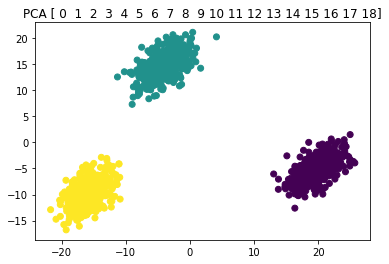

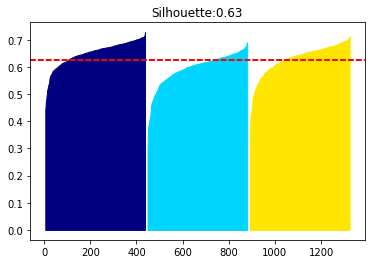

COV 0.6 
ARI  1.0, std 5


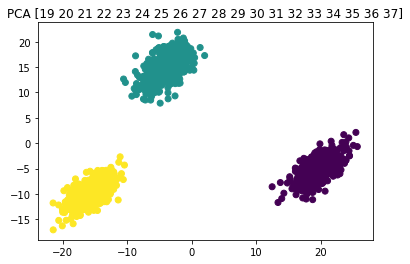

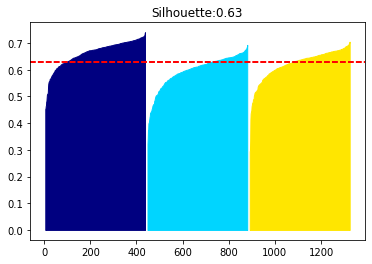

COV 0.6 
ARI  1.0, std 5


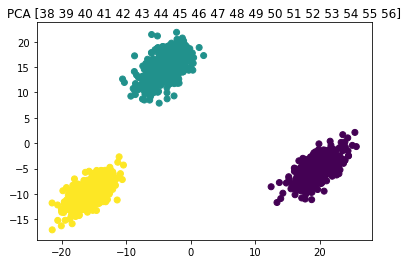

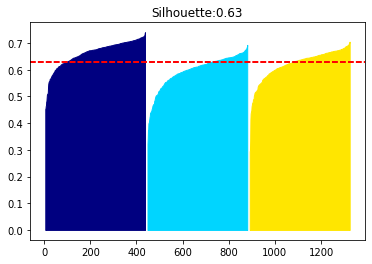

Total: (1300, 462), uniform (1300, 200) , normal (1300, 200),neg bin (1300, 0), gamma (1300, 0), moon (1300, 2), circle (1300, 2),  bimodal (1300, 0), redundat (1300, 5), outliers with uniform (1300, 0), outliers with normal (1300, 0) ,outlier binomial (1300, 0), beta features (1300, 0), 
*** Computing 1D feature ranking ...
Dispersion tests took 0.23 sec
Entropy computation 0.63 sec
KNN computation 0.01 sec
Sorting and thresholds 0.03 sec
Performing hierarchical clustering...
Hierarchical clustering 0.11 sec
Handle redundant features 0.04 sec
Returning 0 redundant features and  19 important features
*** Exploring 2D feature space with NN ...
trimming 787 to 231
handle_close_important (231, 3), total 787, 0.21412386000156403
relevant_features 280 => computing 1638 
trimming 1623 to 0
handle_important_features (231, 3),  total 1638, 0.21412386000156403
irrelevant_features 182 => computing 528
trimming 528 to 231
handle_not_important_features (462, 3), total 528, 0.21412386000156403
hand

  0%|          | 0/21 [00:00<?, ?it/s]

trimming 1365 to 462
handle_all_features (924, 3),  total 1373, 0.21412386000156403
Returning (924, 3), explored a total of 4326 feature pairs
*** Optimization algorithm 
Non redundant features 462, orig size 462, nb imp : 19
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [00:28<02:05,  7.38s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[8, 27, 46]","[2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, ...",0.315948,3.0,"Counter({0: 531, 1: 434, 2: 335})"


Selecting (11, 4) from archive


 38%|███▊      | 8/21 [01:02<01:39,  7.69s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[8, 27, 46]","[2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, ...",0.315948,3.0,"Counter({0: 531, 1: 434, 2: 335})"
1,"[5, 13, 24, 43]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.304513,4.0,"Counter({1: 441, 0: 433, 2: 426})"


Selecting (21, 4) from archive


 57%|█████▋    | 12/21 [01:37<01:09,  7.75s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[8, 27, 46]","[2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, ...",0.315948,3.0,"Counter({0: 531, 1: 434, 2: 335})"
1,"[5, 13, 24, 43]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.304513,4.0,"Counter({1: 441, 0: 433, 2: 426})"
2,"[7, 14, 16, 17, 26, 33, 45, 52, 55]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.302593,9.0,"Counter({2: 434, 0: 433, 1: 433})"


Selecting (31, 4) from archive


 76%|███████▌  | 16/21 [02:16<00:40,  8.06s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[8, 27, 46]","[2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, ...",0.315948,3.0,"Counter({0: 531, 1: 434, 2: 335})"
1,"[5, 13, 24, 43]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.304513,4.0,"Counter({1: 441, 0: 433, 2: 426})"
2,"[7, 14, 16, 17, 26, 33, 45, 52, 55]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.302593,9.0,"Counter({2: 434, 0: 433, 1: 433})"
3,"[32, 51]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.304984,2.0,"Counter({0: 442, 2: 432, 1: 426})"


Selecting (11, 4) from archive


 95%|█████████▌| 20/21 [02:43<00:06,  6.82s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[8, 27, 46]","[2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, ...",0.315948,3.0,"Counter({0: 531, 1: 434, 2: 335})"
1,"[5, 13, 24, 43]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.304513,4.0,"Counter({1: 441, 0: 433, 2: 426})"
2,"[7, 14, 16, 17, 26, 33, 45, 52, 55]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.302593,9.0,"Counter({2: 434, 0: 433, 1: 433})"
3,"[32, 51]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.304984,2.0,"Counter({0: 442, 2: 432, 1: 426})"
4,"[35, 36, 54]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.293366,3.0,"Counter({1: 435, 0: 433, 2: 432})"


Selecting (17, 4) from archive


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 462, orig size 462, nb imp : 19
['ARCHIVE2D', 'CLOSE', 'IMP1D', 'RANDOM'] [50 25 15 10] [0.5, 0.25, 0.15, 0.1]
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [00:31<02:17,  8.10s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.264314,"[0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",37.0,"Counter({2: 434, 0: 433, 1: 433})"


Selecting (50, 4) from archive


 38%|███▊      | 8/21 [02:00<02:55, 13.53s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.264314,"[0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",37.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.191815,"[28, 47]","[0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 2, ...",2.0,"Counter({2: 461, 0: 422, 1: 417})"


Selecting (1, 4) from archive


 57%|█████▋    | 12/21 [02:32<01:20,  8.98s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.264314,"[0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",37.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.191815,"[28, 47]","[0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 2, ...",2.0,"Counter({2: 461, 0: 422, 1: 417})"
2,0.190980,"[23, 42]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, ...",2.0,"Counter({2: 496, 1: 417, 0: 387})"


Selecting (2, 4) from archive


 76%|███████▌  | 16/21 [03:02<00:37,  7.46s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.264314,"[0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",37.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.191815,"[28, 47]","[0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 2, ...",2.0,"Counter({2: 461, 0: 422, 1: 417})"
2,0.190980,"[23, 42]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, ...",2.0,"Counter({2: 496, 1: 417, 0: 387})"
3,0.185511,"[31, 50]","[2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, ...",2.0,"Counter({0: 540, 2: 426, 1: 334})"


Selecting (1, 4) from archive


 95%|█████████▌| 20/21 [03:29<00:06,  6.54s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.264314,"[0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",37.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.191815,"[28, 47]","[0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 2, ...",2.0,"Counter({2: 461, 0: 422, 1: 417})"
2,0.190980,"[23, 42]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, ...",2.0,"Counter({2: 496, 1: 417, 0: 387})"
3,0.185511,"[31, 50]","[2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, ...",2.0,"Counter({0: 540, 2: 426, 1: 334})"
4,0.179422,"[176, 461]","[1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 0, ...",2.0,"Counter({0: 450, 1: 426, 2: 424})"


Selecting (1, 4) from archive


100%|██████████| 21/21 [03:38<00:00, 10.41s/it]


,adapted_ratkowsky_lance,features,partition,size,structure
0,0.264314,"[0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",37.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.191815,"[28, 47]","[0, 1, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 2, ...",2.0,"Counter({2: 461, 0: 422, 1: 417})"
2,0.190980,"[23, 42]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, ...",2.0,"Counter({2: 496, 1: 417, 0: 387})"
3,0.185511,"[31, 50]","[2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, ...",2.0,"Counter({0: 540, 2: 426, 1: 334})"
4,0.179422,"[176, 461]","[1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 0, ...",2.0,"Counter({0: 450, 1: 426, 2: 424})"


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 462, orig size 462, nb imp : 19
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [00:56<04:09, 14.66s/it]

,features,partition,silhouette,size,structure
0,"[26, 45, 46, 55]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.764287,4.0,"Counter({2: 434, 0: 433, 1: 433})"


Selecting (31, 4) from archive


 38%|███▊      | 8/21 [01:51<02:47, 12.89s/it]

,features,partition,silhouette,size,structure
0,"[26, 45, 46, 55]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.764287,4.0,"Counter({2: 434, 0: 433, 1: 433})"
1,"[7, 8]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.757223,2.0,"Counter({2: 434, 0: 433, 1: 433})"


Selecting (36, 4) from archive


 57%|█████▋    | 12/21 [02:50<02:01, 13.46s/it]

,features,partition,silhouette,size,structure
0,"[26, 45, 46, 55]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.764287,4.0,"Counter({2: 434, 0: 433, 1: 433})"
1,"[7, 8]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.757223,2.0,"Counter({2: 434, 0: 433, 1: 433})"
2,"[14, 27, 33, 35, 52, 54]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.739540,6.0,"Counter({2: 434, 0: 433, 1: 433})"


Selecting (46, 4) from archive


 76%|███████▌  | 16/21 [03:47<01:06, 13.21s/it]

,features,partition,silhouette,size,structure
0,"[26, 45, 46, 55]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.764287,4.0,"Counter({2: 434, 0: 433, 1: 433})"
1,"[7, 8]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.757223,2.0,"Counter({2: 434, 0: 433, 1: 433})"
2,"[14, 27, 33, 35, 52, 54]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.739540,6.0,"Counter({2: 434, 0: 433, 1: 433})"
3,"[16, 17, 36]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.697339,3.0,"Counter({1: 434, 0: 433, 2: 433})"


Selecting (20, 4) from archive


 95%|█████████▌| 20/21 [04:50<00:14, 14.09s/it]

,features,partition,silhouette,size,structure
0,"[26, 45, 46, 55]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.764287,4.0,"Counter({2: 434, 0: 433, 1: 433})"
1,"[7, 8]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.757223,2.0,"Counter({2: 434, 0: 433, 1: 433})"
2,"[14, 27, 33, 35, 52, 54]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.739540,6.0,"Counter({2: 434, 0: 433, 1: 433})"
3,"[16, 17, 36]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.697339,3.0,"Counter({1: 434, 0: 433, 2: 433})"
4,"[2, 5, 21, 40, 43]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.644680,5.0,"Counter({1: 434, 0: 433, 2: 433})"


Selecting (35, 4) from archive


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 462, orig size 462, nb imp : 19
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [00:50<03:39, 12.92s/it]

,adapted_silhouette,features,partition,size,structure
0,0.6662,"[0, 2, 5, 7, 8, 9, 10, 13, 14, 16, 17, 21, 24,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",27.0,"Counter({2: 434, 0: 433, 1: 433})"


Selecting (50, 4) from archive


 38%|███▊      | 8/21 [02:10<03:20, 15.43s/it]

,adapted_silhouette,features,partition,size,structure
0,0.666200,"[0, 2, 5, 7, 8, 9, 10, 13, 14, 16, 17, 21, 24,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",27.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.446937,"[6, 19, 25, 32, 44, 51]","[0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, ...",6.0,"Counter({1: 867, 2: 235, 0: 198})"


Selecting (27, 4) from archive


 57%|█████▋    | 12/21 [03:18<02:13, 14.89s/it]

,adapted_silhouette,features,partition,size,structure
0,0.666200,"[0, 2, 5, 7, 8, 9, 10, 13, 14, 16, 17, 21, 24,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",27.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.446937,"[6, 19, 25, 32, 44, 51]","[0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, ...",6.0,"Counter({1: 867, 2: 235, 0: 198})"
2,0.412223,"[1, 4, 20, 23, 39, 40, 42, 47]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.0,"Counter({0: 438, 2: 435, 1: 427})"


Selecting (12, 4) from archive


 76%|███████▌  | 16/21 [04:21<01:08, 13.72s/it]

,adapted_silhouette,features,partition,size,structure
0,0.666200,"[0, 2, 5, 7, 8, 9, 10, 13, 14, 16, 17, 21, 24,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",27.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.446937,"[6, 19, 25, 32, 44, 51]","[0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, ...",6.0,"Counter({1: 867, 2: 235, 0: 198})"
2,0.412223,"[1, 4, 20, 23, 39, 40, 42, 47]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.0,"Counter({0: 438, 2: 435, 1: 427})"
3,0.364097,"[31, 50]","[2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, ...",2.0,"Counter({0: 540, 2: 426, 1: 334})"


Selecting (3, 4) from archive


 95%|█████████▌| 20/21 [05:11<00:12, 12.18s/it]

,adapted_silhouette,features,partition,size,structure
0,0.666200,"[0, 2, 5, 7, 8, 9, 10, 13, 14, 16, 17, 21, 24,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",27.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.446937,"[6, 19, 25, 32, 44, 51]","[0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, ...",6.0,"Counter({1: 867, 2: 235, 0: 198})"
2,0.412223,"[1, 4, 20, 23, 39, 40, 42, 47]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.0,"Counter({0: 438, 2: 435, 1: 427})"
3,0.364097,"[31, 50]","[2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, ...",2.0,"Counter({0: 540, 2: 426, 1: 334})"
4,0.330481,"[381, 459]","[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, ...",2.0,"Counter({1: 733, 2: 340, 0: 227})"


Selecting (1, 4) from archive


100%|██████████| 21/21 [05:28<00:00, 15.63s/it]


COV 0.6 
ARI  1.0, std 5


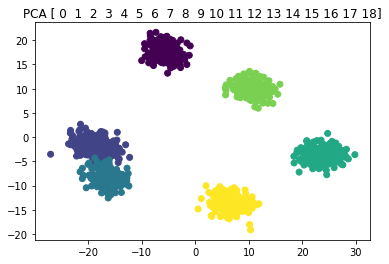

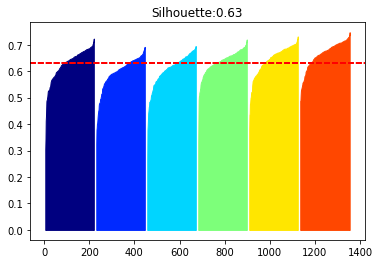

COV 0.6 


/tf/notebooks/discoverS_draft/scripts/data_generator.py:163: RuntimeWarning: covariance is not positive-semidefinite.
  arr = np.random.multivariate_normal(centers[cluster], d_covs[cluster], ns[cluster])


ARI  1.0, std 5


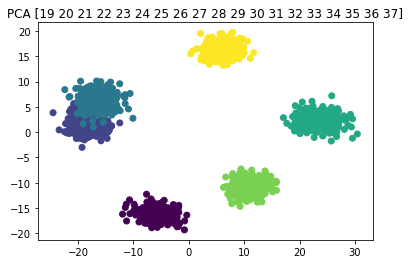

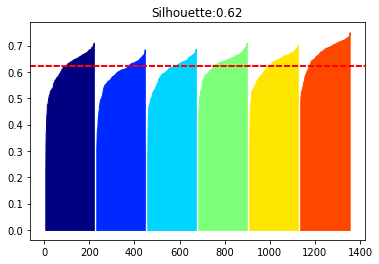

COV 0.6 


/tf/notebooks/discoverS_draft/scripts/data_generator.py:163: RuntimeWarning: covariance is not positive-semidefinite.
  arr = np.random.multivariate_normal(centers[cluster], d_covs[cluster], ns[cluster])


ARI  1.0, std 5


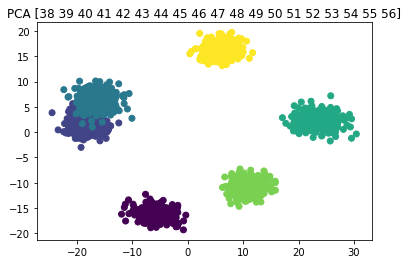

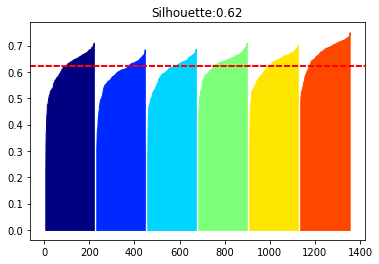

Total: (1300, 462), uniform (1300, 200) , normal (1300, 200),neg bin (1300, 0), gamma (1300, 0), moon (1300, 2), circle (1300, 2),  bimodal (1300, 0), redundat (1300, 5), outliers with uniform (1300, 0), outliers with normal (1300, 0) ,outlier binomial (1300, 0), beta features (1300, 0), 
*** Computing 1D feature ranking ...
Dispersion tests took 0.21 sec
Entropy computation 0.5 sec
KNN computation 0.01 sec
Sorting and thresholds 0.02 sec
Performing hierarchical clustering...
Hierarchical clustering 0.1 sec
Handle redundant features 0.02 sec
Returning 2 redundant features and  14 important features
*** Exploring 2D feature space with NN ...
handle_close_important (78, 3), total 806, 0.11380831152200699
relevant_features 285 => computing 1677 
trimming 1049 to 2
handle_important_features (80, 3),  total 1677, 0.11380831152200699
irrelevant_features 175 => computing 512
handle_not_important_features (87, 3), total 512, 0.11380831152200699
handle_all_features 460 => computing 1369


  0%|          | 0/21 [00:00<?, ?it/s]

handle_all_features (434, 3),  total 1369, 0.11380831152200699
Returning (434, 3), explored a total of 4364 feature pairs
*** Optimization algorithm 
Non redundant features 460, orig size 462, nb imp : 14
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [00:22<01:37,  5.76s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 13, 19, 32, 38, 51, 457]","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.15339,7.0,"Counter({3: 252, 1: 237, 2: 220, 5: 215, 4: 19..."


Selecting (12, 4) from archive


 38%|███▊      | 8/21 [00:55<01:25,  6.60s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 13, 19, 32, 38, 51, 457]","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.153390,7.0,"Counter({3: 252, 1: 237, 2: 220, 5: 215, 4: 19..."
1,"[8, 14, 15, 33, 34, 52, 53]","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",0.153331,7.0,"Counter({2: 220, 1: 217, 4: 216, 0: 216, 3: 21..."


Selecting (22, 4) from archive


 57%|█████▋    | 12/21 [01:36<01:09,  7.69s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 13, 19, 32, 38, 51, 457]","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.153390,7.0,"Counter({3: 252, 1: 237, 2: 220, 5: 215, 4: 19..."
1,"[8, 14, 15, 33, 34, 52, 53]","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",0.153331,7.0,"Counter({2: 220, 1: 217, 4: 216, 0: 216, 3: 21..."
2,"[27, 46]","[0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, ...",0.162027,2.0,"Counter({0: 399, 2: 249, 5: 195, 3: 170, 1: 16..."


Selecting (11, 4) from archive


 76%|███████▌  | 16/21 [02:00<00:31,  6.27s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 13, 19, 32, 38, 51, 457]","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.153390,7.0,"Counter({3: 252, 1: 237, 2: 220, 5: 215, 4: 19..."
1,"[8, 14, 15, 33, 34, 52, 53]","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",0.153331,7.0,"Counter({2: 220, 1: 217, 4: 216, 0: 216, 3: 21..."
2,"[27, 46]","[0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, ...",0.162027,2.0,"Counter({0: 399, 2: 249, 5: 195, 3: 170, 1: 16..."
3,"[7, 26, 45]","[2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, ...",0.157409,3.0,"Counter({4: 367, 1: 300, 2: 200, 3: 195, 0: 13..."


Selecting (10, 4) from archive


 95%|█████████▌| 20/21 [02:28<00:06,  6.23s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 13, 19, 32, 38, 51, 457]","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.153390,7.0,"Counter({3: 252, 1: 237, 2: 220, 5: 215, 4: 19..."
1,"[8, 14, 15, 33, 34, 52, 53]","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",0.153331,7.0,"Counter({2: 220, 1: 217, 4: 216, 0: 216, 3: 21..."
2,"[27, 46]","[0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, ...",0.162027,2.0,"Counter({0: 399, 2: 249, 5: 195, 3: 170, 1: 16..."
3,"[7, 26, 45]","[2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, ...",0.157409,3.0,"Counter({4: 367, 1: 300, 2: 200, 3: 195, 0: 13..."
4,"[6, 25, 44]","[2, 3, 3, 3, 3, 2, 3, 3, 0, 3, 0, 3, 3, 3, 2, ...",0.156905,3.0,"Counter({1: 268, 0: 266, 3: 244, 2: 192, 5: 18..."


Selecting (15, 4) from archive


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 460, orig size 462, nb imp : 14
['ARCHIVE2D', 'CLOSE', 'IMP1D', 'RANDOM'] [50 25 15 10] [0.5, 0.25, 0.15, 0.1]
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [00:37<02:42,  9.57s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.134237,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",63.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."


Selecting (50, 4) from archive


 38%|███▊      | 8/21 [03:07<04:18, 19.87s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.134237,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",63.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."
1,0.102812,"[57, 139, 459]","[0, 5, 2, 4, 4, 0, 4, 0, 1, 5, 1, 1, 5, 2, 4, ...",3.0,"Counter({0: 247, 5: 235, 1: 227, 2: 199, 3: 19..."


Selecting (2, 4) from archive


 57%|█████▋    | 12/21 [03:37<01:29,  9.96s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.134237,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",63.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."
1,0.102812,"[57, 139, 459]","[0, 5, 2, 4, 4, 0, 4, 0, 1, 5, 1, 1, 5, 2, 4, ...",3.0,"Counter({0: 247, 5: 235, 1: 227, 2: 199, 3: 19..."
2,0.099784,"[60, 107, 458]","[0, 4, 5, 4, 5, 2, 4, 5, 2, 0, 4, 1, 4, 5, 3, ...",3.0,"Counter({5: 285, 3: 242, 0: 216, 4: 197, 1: 18..."


Selecting (2, 4) from archive


 76%|███████▌  | 16/21 [04:06<00:36,  7.27s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.134237,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",63.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."
1,0.102812,"[57, 139, 459]","[0, 5, 2, 4, 4, 0, 4, 0, 1, 5, 1, 1, 5, 2, 4, ...",3.0,"Counter({0: 247, 5: 235, 1: 227, 2: 199, 3: 19..."
2,0.099784,"[60, 107, 458]","[0, 4, 5, 4, 5, 2, 4, 5, 2, 0, 4, 1, 4, 5, 3, ...",3.0,"Counter({5: 285, 3: 242, 0: 216, 4: 197, 1: 18..."
3,0.101050,"[63, 105, 461]","[5, 3, 4, 4, 2, 0, 1, 1, 4, 1, 5, 4, 3, 1, 4, ...",3.0,"Counter({0: 237, 4: 231, 5: 220, 3: 213, 1: 20..."


Selecting (1, 4) from archive


 95%|█████████▌| 20/21 [04:50<00:09,  9.83s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.134237,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",63.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."
1,0.102812,"[57, 139, 459]","[0, 5, 2, 4, 4, 0, 4, 0, 1, 5, 1, 1, 5, 2, 4, ...",3.0,"Counter({0: 247, 5: 235, 1: 227, 2: 199, 3: 19..."
2,0.099784,"[60, 107, 458]","[0, 4, 5, 4, 5, 2, 4, 5, 2, 0, 4, 1, 4, 5, 3, ...",3.0,"Counter({5: 285, 3: 242, 0: 216, 4: 197, 1: 18..."
3,0.101050,"[63, 105, 461]","[5, 3, 4, 4, 2, 0, 1, 1, 4, 1, 5, 4, 3, 1, 4, ...",3.0,"Counter({0: 237, 4: 231, 5: 220, 3: 213, 1: 20..."
4,0.083032,"[59, 83, 202]","[2, 1, 2, 0, 1, 3, 3, 5, 5, 5, 2, 0, 1, 3, 2, ...",3.0,"Counter({3: 252, 1: 239, 2: 232, 5: 197, 0: 19..."


Selecting (5, 4) from archive


100%|██████████| 21/21 [05:13<00:00, 14.92s/it]


,adapted_ratkowsky_lance,features,partition,size,structure
0,0.134237,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",63.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."
1,0.102812,"[57, 139, 459]","[0, 5, 2, 4, 4, 0, 4, 0, 1, 5, 1, 1, 5, 2, 4, ...",3.0,"Counter({0: 247, 5: 235, 1: 227, 2: 199, 3: 19..."
2,0.099784,"[60, 107, 458]","[0, 4, 5, 4, 5, 2, 4, 5, 2, 0, 4, 1, 4, 5, 3, ...",3.0,"Counter({5: 285, 3: 242, 0: 216, 4: 197, 1: 18..."
3,0.101050,"[63, 105, 461]","[5, 3, 4, 4, 2, 0, 1, 1, 4, 1, 5, 4, 3, 1, 4, ...",3.0,"Counter({0: 237, 4: 231, 5: 220, 3: 213, 1: 20..."
4,0.083032,"[59, 83, 202]","[2, 1, 2, 0, 1, 3, 3, 5, 5, 5, 2, 0, 1, 3, 2, ...",3.0,"Counter({3: 252, 1: 239, 2: 232, 5: 197, 0: 19..."


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 460, orig size 462, nb imp : 14
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [01:12<05:14, 18.51s/it]

,features,partition,silhouette,size,structure
0,"[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 14, 15, 16...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",0.656576,39.0,"Counter({2: 220, 4: 216, 0: 216, 3: 216, 1: 21..."


Selecting (49, 4) from archive


 38%|███▊      | 8/21 [03:05<04:39, 21.52s/it]

,features,partition,silhouette,size,structure
0,"[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 14, 15, 16...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",0.656576,39.0,"Counter({2: 220, 4: 216, 0: 216, 3: 216, 1: 21..."
1,"[31, 50]","[4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 0, 2, 0, ...",0.536691,2.0,"Counter({2: 438, 0: 305, 4: 198, 3: 139, 1: 11..."


Selecting (7, 4) from archive


 57%|█████▋    | 12/21 [04:14<02:35, 17.32s/it]

,features,partition,silhouette,size,structure
0,"[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 14, 15, 16...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",0.656576,39.0,"Counter({2: 220, 4: 216, 0: 216, 3: 216, 1: 21..."
1,"[31, 50]","[4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 0, 2, 0, ...",0.536691,2.0,"Counter({2: 438, 0: 305, 4: 198, 3: 139, 1: 11..."
2,"[36, 55]","[1, 5, 1, 1, 5, 5, 5, 5, 5, 4, 5, 5, 1, 1, 4, ...",0.530483,2.0,"Counter({4: 438, 1: 268, 0: 246, 5: 126, 3: 11..."


Selecting (7, 4) from archive


 76%|███████▌  | 16/21 [05:20<01:17, 15.41s/it]

,features,partition,silhouette,size,structure
0,"[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 14, 15, 16...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",0.656576,39.0,"Counter({2: 220, 4: 216, 0: 216, 3: 216, 1: 21..."
1,"[31, 50]","[4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 0, 2, 0, ...",0.536691,2.0,"Counter({2: 438, 0: 305, 4: 198, 3: 139, 1: 11..."
2,"[36, 55]","[1, 5, 1, 1, 5, 5, 5, 5, 5, 4, 5, 5, 1, 1, 4, ...",0.530483,2.0,"Counter({4: 438, 1: 268, 0: 246, 5: 126, 3: 11..."
3,"[24, 43]","[2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.529920,2.0,"Counter({1: 399, 0: 290, 2: 253, 4: 159, 5: 10..."


Selecting (13, 4) from archive


 95%|█████████▌| 20/21 [06:26<00:15, 15.54s/it]

,features,partition,silhouette,size,structure
0,"[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 14, 15, 16...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",0.656576,39.0,"Counter({2: 220, 4: 216, 0: 216, 3: 216, 1: 21..."
1,"[31, 50]","[4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 0, 2, 0, ...",0.536691,2.0,"Counter({2: 438, 0: 305, 4: 198, 3: 139, 1: 11..."
2,"[36, 55]","[1, 5, 1, 1, 5, 5, 5, 5, 5, 4, 5, 5, 1, 1, 4, ...",0.530483,2.0,"Counter({4: 438, 1: 268, 0: 246, 5: 126, 3: 11..."
3,"[24, 43]","[2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.529920,2.0,"Counter({1: 399, 0: 290, 2: 253, 4: 159, 5: 10..."
4,"[37, 56]","[3, 5, 5, 2, 5, 2, 2, 2, 2, 2, 5, 5, 5, 2, 0, ...",0.524433,2.0,"Counter({2: 331, 3: 255, 1: 213, 4: 199, 0: 17..."


Selecting (2, 4) from archive


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 460, orig size 462, nb imp : 14
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [01:10<05:09, 18.19s/it]

,adapted_silhouette,features,partition,size,structure
0,0.615171,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",55.0,"Counter({2: 220, 4: 216, 0: 216, 3: 216, 1: 21..."


Selecting (50, 4) from archive


 38%|███▊      | 8/21 [03:18<05:03, 23.37s/it]

,adapted_silhouette,features,partition,size,structure
0,0.615171,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",55.0,"Counter({2: 220, 4: 216, 0: 216, 3: 216, 1: 21..."
1,0.357794,"[31, 50]","[4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 0, 2, 0, ...",2.0,"Counter({2: 438, 0: 305, 4: 198, 3: 139, 1: 11..."


Selecting (1, 4) from archive


 57%|█████▋    | 12/21 [04:30<02:46, 18.45s/it]

,adapted_silhouette,features,partition,size,structure
0,0.615171,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",55.0,"Counter({2: 220, 4: 216, 0: 216, 3: 216, 1: 21..."
1,0.357794,"[31, 50]","[4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 0, 2, 0, ...",2.0,"Counter({2: 438, 0: 305, 4: 198, 3: 139, 1: 11..."
2,0.295656,"[107, 457, 458]","[2, 5, 3, 5, 3, 2, 5, 3, 2, 3, 5, 5, 5, 5, 3, ...",3.0,"Counter({3: 266, 4: 231, 1: 227, 5: 196, 0: 19..."


Selecting (1, 4) from archive


 76%|███████▌  | 16/21 [05:46<01:24, 16.89s/it]

,adapted_silhouette,features,partition,size,structure
0,0.615171,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",55.0,"Counter({2: 220, 4: 216, 0: 216, 3: 216, 1: 21..."
1,0.357794,"[31, 50]","[4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 0, 2, 0, ...",2.0,"Counter({2: 438, 0: 305, 4: 198, 3: 139, 1: 11..."
2,0.295656,"[107, 457, 458]","[2, 5, 3, 5, 3, 2, 5, 3, 2, 3, 5, 5, 5, 5, 3, ...",3.0,"Counter({3: 266, 4: 231, 1: 227, 5: 196, 0: 19..."
3,0.266312,"[83, 139, 459]","[2, 5, 1, 2, 2, 0, 0, 0, 3, 4, 1, 3, 2, 3, 2, ...",3.0,"Counter({2: 238, 1: 230, 4: 227, 0: 224, 3: 19..."


Selecting (7, 4) from archive


 95%|█████████▌| 20/21 [06:52<00:15, 15.90s/it]

,adapted_silhouette,features,partition,size,structure
0,0.615171,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",55.0,"Counter({2: 220, 4: 216, 0: 216, 3: 216, 1: 21..."
1,0.357794,"[31, 50]","[4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 0, 2, 0, ...",2.0,"Counter({2: 438, 0: 305, 4: 198, 3: 139, 1: 11..."
2,0.295656,"[107, 457, 458]","[2, 5, 3, 5, 3, 2, 5, 3, 2, 3, 5, 5, 5, 5, 3, ...",3.0,"Counter({3: 266, 4: 231, 1: 227, 5: 196, 0: 19..."
3,0.266312,"[83, 139, 459]","[2, 5, 1, 2, 2, 0, 0, 0, 3, 4, 1, 3, 2, 3, 2, ...",3.0,"Counter({2: 238, 1: 230, 4: 227, 0: 224, 3: 19..."
4,0.253460,"[57, 105, 461]","[0, 4, 5, 1, 1, 0, 2, 2, 1, 4, 3, 1, 4, 4, 1, ...",3.0,"Counter({0: 258, 5: 236, 2: 229, 3: 209, 1: 19..."


Selecting (2, 4) from archive


100%|██████████| 21/21 [07:27<00:00, 21.29s/it]


COV 0.6 
ARI  1.0, std 5


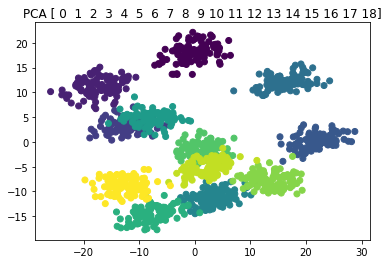

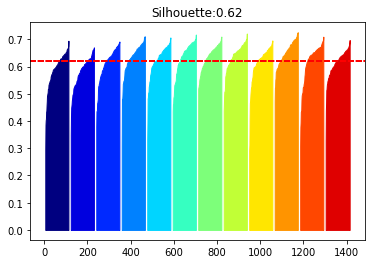

COV 0.6 
ARI  1.0, std 5


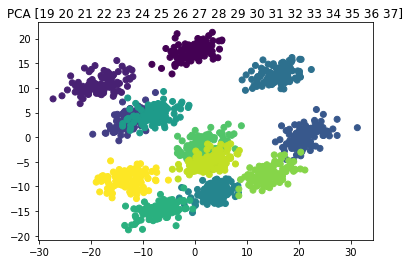

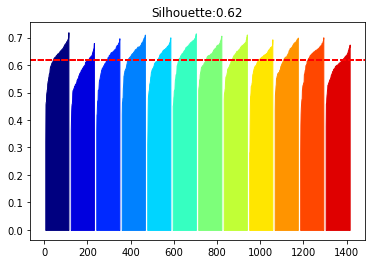

COV 0.6 
ARI  1.0, std 5


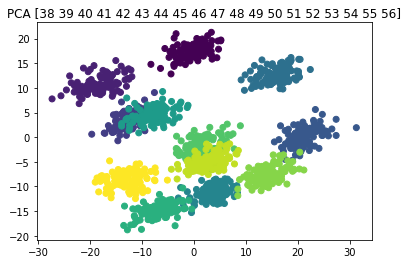

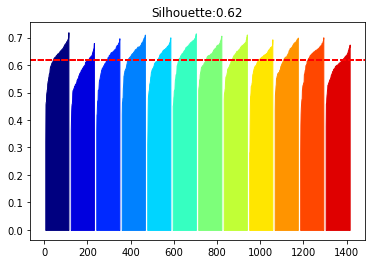

Total: (1300, 462), uniform (1300, 200) , normal (1300, 200),neg bin (1300, 0), gamma (1300, 0), moon (1300, 2), circle (1300, 2),  bimodal (1300, 0), redundat (1300, 5), outliers with uniform (1300, 0), outliers with normal (1300, 0) ,outlier binomial (1300, 0), beta features (1300, 0), 
*** Computing 1D feature ranking ...
Dispersion tests took 0.28 sec
Entropy computation 0.82 sec
KNN computation 0.01 sec
Sorting and thresholds 0.05 sec
Performing hierarchical clustering...
Hierarchical clustering 0.12 sec
Handle redundant features 0.04 sec
Returning 1 redundant features and  16 important features
*** Exploring 2D feature space with NN ...
handle_close_important (0, 3), total 799, nan
relevant_features 284 => computing 1668 
handle_important_features (0, 3),  total 1668, nan
irrelevant_features 177 => computing 514
handle_not_important_features (0, 3), total 514, nan
handle_all_features 461 => computing 1367


  0%|          | 0/21 [00:00<?, ?it/s]

handle_all_features (0, 3),  total 1367, nan
Returning (0, 3), explored a total of 4348 feature pairs
*** Optimization algorithm 
Non redundant features 461, orig size 462, nb imp : 16
adding 50 random population


 19%|█▉        | 4/21 [01:23<06:01, 21.26s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 1, 5, 6, 7, 8, 10, 12, 13, 15, 16, 17, 19,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.07239,40.0,"Counter({9: 112, 5: 108, 10: 108, 0: 108, 2: 1..."


adding 21 random population


 38%|███▊      | 8/21 [04:50<06:45, 31.17s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 1, 5, 6, 7, 8, 10, 12, 13, 15, 16, 17, 19,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.072390,40.0,"Counter({9: 112, 5: 108, 10: 108, 0: 108, 2: 1..."
1,"[2, 3, 4, 9, 11, 18, 23, 28, 35, 37, 42, 47, 5...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",0.067629,15.0,"Counter({1: 216, 9: 112, 2: 110, 10: 108, 6: 1..."


adding 5 random population


 57%|█████▋    | 12/21 [06:45<03:31, 23.45s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 1, 5, 6, 7, 8, 10, 12, 13, 15, 16, 17, 19,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.072390,40.0,"Counter({9: 112, 5: 108, 10: 108, 0: 108, 2: 1..."
1,"[2, 3, 4, 9, 11, 18, 23, 28, 35, 37, 42, 47, 5...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",0.067629,15.0,"Counter({1: 216, 9: 112, 2: 110, 10: 108, 6: 1..."
2,"[58, 106, 461]","[8, 9, 1, 10, 11, 4, 1, 5, 0, 11, 6, 0, 0, 1, ...",0.071787,3.0,"Counter({10: 180, 1: 152, 2: 122, 0: 110, 7: 1..."


adding 3 random population


 76%|███████▌  | 16/21 [07:51<01:23, 16.62s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 1, 5, 6, 7, 8, 10, 12, 13, 15, 16, 17, 19,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.072390,40.0,"Counter({9: 112, 5: 108, 10: 108, 0: 108, 2: 1..."
1,"[2, 3, 4, 9, 11, 18, 23, 28, 35, 37, 42, 47, 5...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",0.067629,15.0,"Counter({1: 216, 9: 112, 2: 110, 10: 108, 6: 1..."
2,"[58, 106, 461]","[8, 9, 1, 10, 11, 4, 1, 5, 0, 11, 6, 0, 0, 1, ...",0.071787,3.0,"Counter({10: 180, 1: 152, 2: 122, 0: 110, 7: 1..."
3,"[14, 20, 202]","[10, 5, 10, 5, 5, 5, 10, 10, 5, 5, 7, 7, 10, 5...",0.070202,3.0,"Counter({2: 172, 0: 164, 1: 139, 8: 118, 6: 11..."


adding 6 random population


 95%|█████████▌| 20/21 [08:56<00:14, 14.77s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 1, 5, 6, 7, 8, 10, 12, 13, 15, 16, 17, 19,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.072390,40.0,"Counter({9: 112, 5: 108, 10: 108, 0: 108, 2: 1..."
1,"[2, 3, 4, 9, 11, 18, 23, 28, 35, 37, 42, 47, 5...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",0.067629,15.0,"Counter({1: 216, 9: 112, 2: 110, 10: 108, 6: 1..."
2,"[58, 106, 461]","[8, 9, 1, 10, 11, 4, 1, 5, 0, 11, 6, 0, 0, 1, ...",0.071787,3.0,"Counter({10: 180, 1: 152, 2: 122, 0: 110, 7: 1..."
3,"[14, 20, 202]","[10, 5, 10, 5, 5, 5, 10, 10, 5, 5, 7, 7, 10, 5...",0.070202,3.0,"Counter({2: 172, 0: 164, 1: 139, 8: 118, 6: 11..."
4,"[191, 212]","[6, 7, 1, 5, 11, 10, 3, 3, 1, 6, 11, 8, 8, 7, ...",0.076260,2.0,"Counter({2: 141, 11: 124, 6: 115, 5: 113, 3: 1..."


adding 2 random population


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 461, orig size 462, nb imp : 16
['ARCHIVE2D', 'CLOSE', 'IMP1D', 'RANDOM'] [50 25 15 10] [0.5, 0.25, 0.15, 0.1]
adding 50 random population


 19%|█▉        | 4/21 [00:53<03:51, 13.63s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.063777,"[0, 2, 5, 7, 8, 10, 12, 13, 14, 15, 17, 18, 19...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",40.0,"Counter({9: 112, 10: 108, 6: 108, 0: 108, 2: 1..."


adding 46 random population


 38%|███▊      | 8/21 [03:22<05:01, 23.19s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.063777,"[0, 2, 5, 7, 8, 10, 12, 13, 14, 15, 17, 18, 19...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",40.0,"Counter({9: 112, 10: 108, 6: 108, 0: 108, 2: 1..."
1,0.050429,"[4, 9, 11, 16, 23, 24, 25, 30, 35, 42, 43, 47,...","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...",22.0,"Counter({6: 112, 8: 108, 7: 108, 0: 108, 4: 10..."


adding 5 random population


 57%|█████▋    | 12/21 [07:55<06:15, 41.73s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.063777,"[0, 2, 5, 7, 8, 10, 12, 13, 14, 15, 17, 18, 19...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",40.0,"Counter({9: 112, 10: 108, 6: 108, 0: 108, 2: 1..."
1,0.050429,"[4, 9, 11, 16, 23, 24, 25, 30, 35, 42, 43, 47,...","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...",22.0,"Counter({6: 112, 8: 108, 7: 108, 0: 108, 4: 10..."
2,0.049472,"[3, 6, 22, 26, 41, 133, 148]","[4, 0, 10, 4, 0, 4, 10, 10, 10, 10, 4, 0, 10, ...",7.0,"Counter({2: 167, 9: 131, 8: 130, 10: 119, 1: 1..."


adding 9 random population


 76%|███████▌  | 16/21 [10:18<02:43, 32.63s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.063777,"[0, 2, 5, 7, 8, 10, 12, 13, 14, 15, 17, 18, 19...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",40.0,"Counter({9: 112, 10: 108, 6: 108, 0: 108, 2: 1..."
1,0.050429,"[4, 9, 11, 16, 23, 24, 25, 30, 35, 42, 43, 47,...","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...",22.0,"Counter({6: 112, 8: 108, 7: 108, 0: 108, 4: 10..."
2,0.049472,"[3, 6, 22, 26, 41, 133, 148]","[4, 0, 10, 4, 0, 4, 10, 10, 10, 10, 4, 0, 10, ...",7.0,"Counter({2: 167, 9: 131, 8: 130, 10: 119, 1: 1..."
3,0.045755,"[65, 71, 96, 97, 458]","[3, 3, 3, 11, 0, 10, 4, 10, 9, 2, 2, 2, 0, 8, ...",5.0,"Counter({1: 151, 9: 139, 7: 137, 2: 128, 11: 1..."


adding 5 random population


 95%|█████████▌| 20/21 [12:27<00:29, 29.27s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.063777,"[0, 2, 5, 7, 8, 10, 12, 13, 14, 15, 17, 18, 19...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",40.0,"Counter({9: 112, 10: 108, 6: 108, 0: 108, 2: 1..."
1,0.050429,"[4, 9, 11, 16, 23, 24, 25, 30, 35, 42, 43, 47,...","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...",22.0,"Counter({6: 112, 8: 108, 7: 108, 0: 108, 4: 10..."
2,0.049472,"[3, 6, 22, 26, 41, 133, 148]","[4, 0, 10, 4, 0, 4, 10, 10, 10, 10, 4, 0, 10, ...",7.0,"Counter({2: 167, 9: 131, 8: 130, 10: 119, 1: 1..."
3,0.045755,"[65, 71, 96, 97, 458]","[3, 3, 3, 11, 0, 10, 4, 10, 9, 2, 2, 2, 0, 8, ...",5.0,"Counter({1: 151, 9: 139, 7: 137, 2: 128, 11: 1..."
4,0.045142,"[77, 82, 121, 144]","[2, 1, 2, 10, 3, 1, 11, 2, 0, 8, 2, 8, 1, 4, 8...",4.0,"Counter({0: 169, 8: 166, 1: 136, 4: 136, 2: 12..."


adding 1 random population


100%|██████████| 21/21 [13:25<00:00, 38.38s/it]


,adapted_ratkowsky_lance,features,partition,size,structure
0,0.063777,"[0, 2, 5, 7, 8, 10, 12, 13, 14, 15, 17, 18, 19...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",40.0,"Counter({9: 112, 10: 108, 6: 108, 0: 108, 2: 1..."
1,0.050429,"[4, 9, 11, 16, 23, 24, 25, 30, 35, 42, 43, 47,...","[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...",22.0,"Counter({6: 112, 8: 108, 7: 108, 0: 108, 4: 10..."
2,0.049472,"[3, 6, 22, 26, 41, 133, 148]","[4, 0, 10, 4, 0, 4, 10, 10, 10, 10, 4, 0, 10, ...",7.0,"Counter({2: 167, 9: 131, 8: 130, 10: 119, 1: 1..."
3,0.045755,"[65, 71, 96, 97, 458]","[3, 3, 3, 11, 0, 10, 4, 10, 9, 2, 2, 2, 0, 8, ...",5.0,"Counter({1: 151, 9: 139, 7: 137, 2: 128, 11: 1..."
4,0.045142,"[77, 82, 121, 144]","[2, 1, 2, 10, 3, 1, 11, 2, 0, 8, 2, 8, 1, 4, 8...",4.0,"Counter({0: 169, 8: 166, 1: 136, 4: 136, 2: 12..."


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 461, orig size 462, nb imp : 16
adding 50 random population


 19%|█▉        | 4/21 [01:48<07:52, 27.77s/it]

,features,partition,silhouette,size,structure
0,"[0, 1, 2, 6, 7, 8, 11, 12, 13, 14, 15, 19, 20,...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",0.617731,27.0,"Counter({11: 112, 10: 108, 6: 108, 0: 108, 9: ..."


adding 18 random population


 38%|███▊      | 8/21 [04:26<06:46, 31.28s/it]

,features,partition,silhouette,size,structure
0,"[0, 1, 2, 6, 7, 8, 11, 12, 13, 14, 15, 19, 20,...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",0.617731,27.0,"Counter({11: 112, 10: 108, 6: 108, 0: 108, 9: ..."
1,"[88, 204]","[5, 11, 0, 11, 1, 11, 3, 9, 7, 4, 5, 2, 2, 4, ...",0.356573,2.0,"Counter({3: 148, 5: 143, 2: 138, 11: 114, 1: 1..."


adding 1 random population


 57%|█████▋    | 12/21 [06:24<04:15, 28.44s/it]

,features,partition,silhouette,size,structure
0,"[0, 1, 2, 6, 7, 8, 11, 12, 13, 14, 15, 19, 20,...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",0.617731,27.0,"Counter({11: 112, 10: 108, 6: 108, 0: 108, 9: ..."
1,"[88, 204]","[5, 11, 0, 11, 1, 11, 3, 9, 7, 4, 5, 2, 2, 4, ...",0.356573,2.0,"Counter({3: 148, 5: 143, 2: 138, 11: 114, 1: 1..."
2,"[4, 5, 10, 16, 17, 18, 21, 24, 25, 30, 34, 35,...","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...",0.597570,25.0,"Counter({9: 112, 7: 108, 8: 108, 0: 108, 10: 1..."


adding 5 random population


 76%|███████▌  | 16/21 [08:42<02:22, 28.50s/it]

,features,partition,silhouette,size,structure
0,"[0, 1, 2, 6, 7, 8, 11, 12, 13, 14, 15, 19, 20,...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",0.617731,27.0,"Counter({11: 112, 10: 108, 6: 108, 0: 108, 9: ..."
1,"[88, 204]","[5, 11, 0, 11, 1, 11, 3, 9, 7, 4, 5, 2, 2, 4, ...",0.356573,2.0,"Counter({3: 148, 5: 143, 2: 138, 11: 114, 1: 1..."
2,"[4, 5, 10, 16, 17, 18, 21, 24, 25, 30, 34, 35,...","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...",0.597570,25.0,"Counter({9: 112, 7: 108, 8: 108, 0: 108, 10: 1..."
3,"[96, 101]","[1, 9, 9, 2, 8, 8, 8, 2, 4, 5, 11, 9, 2, 2, 2,...",0.357378,2.0,"Counter({11: 151, 1: 144, 4: 144, 7: 137, 2: 1..."


adding 5 random population


 95%|█████████▌| 20/21 [10:24<00:24, 24.56s/it]

,features,partition,silhouette,size,structure
0,"[0, 1, 2, 6, 7, 8, 11, 12, 13, 14, 15, 19, 20,...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",0.617731,27.0,"Counter({11: 112, 10: 108, 6: 108, 0: 108, 9: ..."
1,"[88, 204]","[5, 11, 0, 11, 1, 11, 3, 9, 7, 4, 5, 2, 2, 4, ...",0.356573,2.0,"Counter({3: 148, 5: 143, 2: 138, 11: 114, 1: 1..."
2,"[4, 5, 10, 16, 17, 18, 21, 24, 25, 30, 34, 35,...","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...",0.597570,25.0,"Counter({9: 112, 7: 108, 8: 108, 0: 108, 10: 1..."
3,"[96, 101]","[1, 9, 9, 2, 8, 8, 8, 2, 4, 5, 11, 9, 2, 2, 2,...",0.357378,2.0,"Counter({11: 151, 1: 144, 4: 144, 7: 137, 2: 1..."
4,"[87, 134]","[9, 6, 2, 0, 7, 5, 3, 5, 3, 2, 7, 7, 10, 10, 1...",0.354307,2.0,"Counter({5: 129, 3: 126, 1: 125, 7: 123, 4: 12..."


adding 6 random population


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 461, orig size 462, nb imp : 16
adding 50 random population


 19%|█▉        | 4/21 [01:25<06:13, 21.97s/it]

,adapted_silhouette,features,partition,size,structure
0,0.606944,"[0, 1, 2, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",37.0,"Counter({9: 112, 5: 108, 10: 108, 0: 108, 8: 1..."


adding 29 random population


 38%|███▊      | 8/21 [04:05<06:13, 28.72s/it]

,adapted_silhouette,features,partition,size,structure
0,0.606944,"[0, 1, 2, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",37.0,"Counter({9: 112, 5: 108, 10: 108, 0: 108, 8: 1..."
1,0.487521,"[3, 5, 6, 17, 21, 22, 50, 52, 56]","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",9.0,"Counter({9: 112, 5: 108, 10: 108, 0: 108, 8: 1..."


adding 5 random population


 57%|█████▋    | 12/21 [06:07<03:55, 26.20s/it]

,adapted_silhouette,features,partition,size,structure
0,0.606944,"[0, 1, 2, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",37.0,"Counter({9: 112, 5: 108, 10: 108, 0: 108, 8: 1..."
1,0.487521,"[3, 5, 6, 17, 21, 22, 50, 52, 56]","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",9.0,"Counter({9: 112, 5: 108, 10: 108, 0: 108, 8: 1..."
2,0.347106,"[24, 43]","[8, 5, 5, 11, 11, 1, 5, 5, 5, 11, 3, 5, 5, 11,...",2.0,"Counter({11: 164, 5: 163, 1: 131, 6: 123, 4: 1..."


adding 2 random population


 76%|███████▌  | 16/21 [07:45<01:55, 23.02s/it]

,adapted_silhouette,features,partition,size,structure
0,0.606944,"[0, 1, 2, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",37.0,"Counter({9: 112, 5: 108, 10: 108, 0: 108, 8: 1..."
1,0.487521,"[3, 5, 6, 17, 21, 22, 50, 52, 56]","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",9.0,"Counter({9: 112, 5: 108, 10: 108, 0: 108, 8: 1..."
2,0.347106,"[24, 43]","[8, 5, 5, 11, 11, 1, 5, 5, 5, 11, 3, 5, 5, 11,...",2.0,"Counter({11: 164, 5: 163, 1: 131, 6: 123, 4: 1..."
3,0.247012,"[69, 214]","[2, 7, 0, 7, 3, 10, 6, 0, 11, 8, 0, 10, 2, 5, ...",2.0,"Counter({10: 127, 2: 125, 3: 116, 6: 114, 5: 1..."


adding 2 random population


 95%|█████████▌| 20/21 [09:15<00:21, 21.30s/it]

,adapted_silhouette,features,partition,size,structure
0,0.606944,"[0, 1, 2, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",37.0,"Counter({9: 112, 5: 108, 10: 108, 0: 108, 8: 1..."
1,0.487521,"[3, 5, 6, 17, 21, 22, 50, 52, 56]","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",9.0,"Counter({9: 112, 5: 108, 10: 108, 0: 108, 8: 1..."
2,0.347106,"[24, 43]","[8, 5, 5, 11, 11, 1, 5, 5, 5, 11, 3, 5, 5, 11,...",2.0,"Counter({11: 164, 5: 163, 1: 131, 6: 123, 4: 1..."
3,0.247012,"[69, 214]","[2, 7, 0, 7, 3, 10, 6, 0, 11, 8, 0, 10, 2, 5, ...",2.0,"Counter({10: 127, 2: 125, 3: 116, 6: 114, 5: 1..."
4,0.290136,"[16, 33, 35, 91]","[6, 6, 8, 6, 8, 8, 8, 6, 6, 6, 6, 8, 6, 8, 6, ...",4.0,"Counter({2: 157, 9: 138, 1: 138, 6: 125, 11: 1..."


adding 10 random population


100%|██████████| 21/21 [10:00<00:00, 28.60s/it]


>> std 8
COV 0.9 
ARI  1.0, std 8


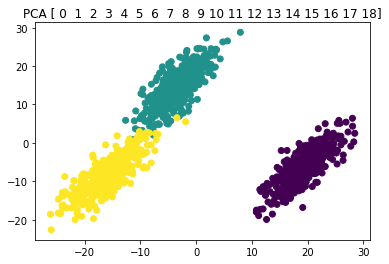

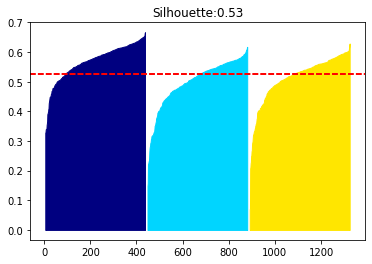

COV 0.9 
ARI  1.0, std 8


/tf/notebooks/discoverS_draft/scripts/data_generator.py:163: RuntimeWarning: covariance is not positive-semidefinite.
  arr = np.random.multivariate_normal(centers[cluster], d_covs[cluster], ns[cluster])


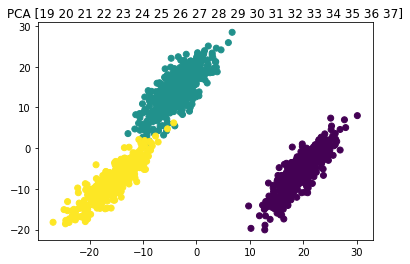

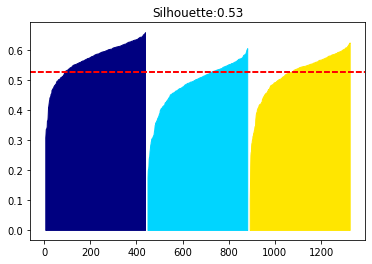

COV 0.9 
ARI  1.0, std 8

/tf/notebooks/discoverS_draft/scripts/data_generator.py:163: RuntimeWarning: covariance is not positive-semidefinite.
  arr = np.random.multivariate_normal(centers[cluster], d_covs[cluster], ns[cluster])


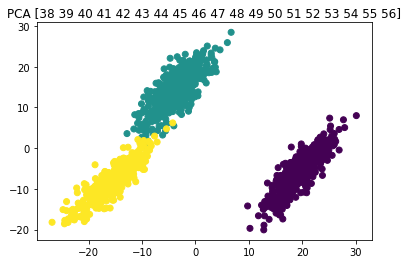

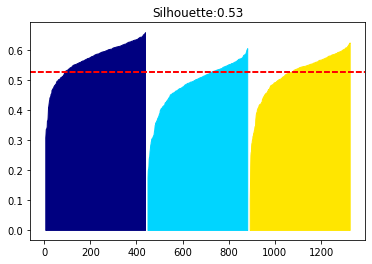

Total: (1300, 462), uniform (1300, 200) , normal (1300, 200),neg bin (1300, 0), gamma (1300, 0), moon (1300, 2), circle (1300, 2),  bimodal (1300, 0), redundat (1300, 5), outliers with uniform (1300, 0), outliers with normal (1300, 0) ,outlier binomial (1300, 0), beta features (1300, 0), 
*** Computing 1D feature ranking ...
Dispersion tests took 0.22 sec
Entropy computation 0.52 sec
KNN computation 0.01 sec
Sorting and thresholds 0.03 sec
Performing hierarchical clustering...
Hierarchical clustering 0.1 sec
Handle redundant features 0.02 sec
Returning 0 redundant features and  22 important features
*** Exploring 2D feature space with NN ...
trimming 787 to 231
handle_close_important (231, 3), total 787, 0.20719227194786072
relevant_features 278 => computing 1627 
trimming 1618 to 0
handle_important_features (231, 3),  total 1627, 0.20719227194786072
irrelevant_features 184 => computing 545
trimming 545 to 231
handle_not_important_features (462, 3), total 545, 0.20719227194786072
handl

  0%|          | 0/21 [00:00<?, ?it/s]

trimming 1363 to 462
handle_all_features (924, 3),  total 1373, 0.20719227194786072
Returning (924, 3), explored a total of 4332 feature pairs
*** Optimization algorithm 
Non redundant features 462, orig size 462, nb imp : 22
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [00:17<01:14,  4.36s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[8, 27, 46]","[2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, ...",0.305012,3.0,"Counter({2: 471, 1: 433, 0: 396})"


Selecting (12, 4) from archive


 38%|███▊      | 8/21 [00:38<01:02,  4.80s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[8, 27, 46]","[2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, ...",0.305012,3.0,"Counter({2: 471, 1: 433, 0: 396})"
1,"[14, 26, 33, 52]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.293068,4.0,"Counter({1: 444, 0: 433, 2: 423})"


Selecting (16, 4) from archive


 57%|█████▋    | 12/21 [01:00<00:45,  5.02s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[8, 27, 46]","[2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, ...",0.305012,3.0,"Counter({2: 471, 1: 433, 0: 396})"
1,"[14, 26, 33, 52]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.293068,4.0,"Counter({1: 444, 0: 433, 2: 423})"
2,"[5, 24, 43]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.290221,3.0,"Counter({2: 462, 0: 437, 1: 401})"


Selecting (15, 4) from archive


 76%|███████▌  | 16/21 [01:21<00:24,  4.95s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[8, 27, 46]","[2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, ...",0.305012,3.0,"Counter({2: 471, 1: 433, 0: 396})"
1,"[14, 26, 33, 52]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.293068,4.0,"Counter({1: 444, 0: 433, 2: 423})"
2,"[5, 24, 43]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.290221,3.0,"Counter({2: 462, 0: 437, 1: 401})"
3,"[17, 36, 55]","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, ...",0.287949,3.0,"Counter({2: 443, 1: 435, 0: 422})"


Selecting (13, 4) from archive


 95%|█████████▌| 20/21 [01:44<00:05,  5.12s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[8, 27, 46]","[2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, ...",0.305012,3.0,"Counter({2: 471, 1: 433, 0: 396})"
1,"[14, 26, 33, 52]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.293068,4.0,"Counter({1: 444, 0: 433, 2: 423})"
2,"[5, 24, 43]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.290221,3.0,"Counter({2: 462, 0: 437, 1: 401})"
3,"[17, 36, 55]","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, ...",0.287949,3.0,"Counter({2: 443, 1: 435, 0: 422})"
4,"[7, 45]","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.294374,2.0,"Counter({2: 463, 1: 439, 0: 398})"


Selecting (17, 4) from archive


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 462, orig size 462, nb imp : 22
['ARCHIVE2D', 'CLOSE', 'IMP1D', 'RANDOM'] [50 25 15 10] [0.5, 0.25, 0.15, 0.1]
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [00:25<01:50,  6.48s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.238803,"[0, 1, 2, 4, 5, 7, 8, 9, 10, 13, 14, 16, 17, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",33.0,"Counter({2: 434, 0: 433, 1: 433})"


Selecting (50, 4) from archive


 38%|███▊      | 8/21 [01:29<02:04,  9.61s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.238803,"[0, 1, 2, 4, 5, 7, 8, 9, 10, 13, 14, 16, 17, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",33.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.198408,"[28, 40, 47]","[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, ...",3.0,"Counter({0: 506, 2: 426, 1: 368})"


Selecting (2, 4) from archive


 57%|█████▋    | 12/21 [01:47<00:49,  5.51s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.238803,"[0, 1, 2, 4, 5, 7, 8, 9, 10, 13, 14, 16, 17, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",33.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.198408,"[28, 40, 47]","[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, ...",3.0,"Counter({0: 506, 2: 426, 1: 368})"
2,0.186875,"[11, 30, 37, 49, 56]","[2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, ...",5.0,"Counter({2: 565, 1: 434, 0: 301})"


Selecting (4, 4) from archive


 76%|███████▌  | 16/21 [02:23<00:36,  7.39s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.238803,"[0, 1, 2, 4, 5, 7, 8, 9, 10, 13, 14, 16, 17, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",33.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.198408,"[28, 40, 47]","[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, ...",3.0,"Counter({0: 506, 2: 426, 1: 368})"
2,0.186875,"[11, 30, 37, 49, 56]","[2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, ...",5.0,"Counter({2: 565, 1: 434, 0: 301})"
3,0.179422,"[176, 461]","[1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 0, ...",2.0,"Counter({0: 450, 1: 426, 2: 424})"


Selecting (1, 4) from archive


 95%|█████████▌| 20/21 [02:52<00:06,  6.92s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.238803,"[0, 1, 2, 4, 5, 7, 8, 9, 10, 13, 14, 16, 17, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",33.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.198408,"[28, 40, 47]","[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, ...",3.0,"Counter({0: 506, 2: 426, 1: 368})"
2,0.186875,"[11, 30, 37, 49, 56]","[2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, ...",5.0,"Counter({2: 565, 1: 434, 0: 301})"
3,0.179422,"[176, 461]","[1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 0, ...",2.0,"Counter({0: 450, 1: 426, 2: 424})"
4,0.175462,"[12, 31, 39, 50]","[0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, ...",4.0,"Counter({2: 542, 0: 420, 1: 338})"


Selecting (1, 4) from archive


100%|██████████| 21/21 [03:06<00:00,  8.89s/it]


,adapted_ratkowsky_lance,features,partition,size,structure
0,0.238803,"[0, 1, 2, 4, 5, 7, 8, 9, 10, 13, 14, 16, 17, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",33.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.198408,"[28, 40, 47]","[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, ...",3.0,"Counter({0: 506, 2: 426, 1: 368})"
2,0.186875,"[11, 30, 37, 49, 56]","[2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, ...",5.0,"Counter({2: 565, 1: 434, 0: 301})"
3,0.179422,"[176, 461]","[1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 0, ...",2.0,"Counter({0: 450, 1: 426, 2: 424})"
4,0.175462,"[12, 31, 39, 50]","[0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, ...",4.0,"Counter({2: 542, 0: 420, 1: 338})"


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 462, orig size 462, nb imp : 22
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [00:59<04:20, 15.31s/it]

,features,partition,silhouette,size,structure
0,"[7, 8, 14, 16, 26, 27, 33, 45, 46, 52]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.697812,10.0,"Counter({2: 434, 0: 433, 1: 433})"


Selecting (46, 4) from archive


 38%|███▊      | 8/21 [02:12<03:29, 16.08s/it]

,features,partition,silhouette,size,structure
0,"[7, 8, 14, 16, 26, 27, 33, 45, 46, 52]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.697812,10.0,"Counter({2: 434, 0: 433, 1: 433})"
1,"[35, 36]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.622017,2.0,"Counter({2: 441, 0: 433, 1: 426})"


Selecting (22, 4) from archive


 57%|█████▋    | 12/21 [03:14<02:14, 14.90s/it]

,features,partition,silhouette,size,structure
0,"[7, 8, 14, 16, 26, 27, 33, 45, 46, 52]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.697812,10.0,"Counter({2: 434, 0: 433, 1: 433})"
1,"[35, 36]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.622017,2.0,"Counter({2: 441, 0: 433, 1: 426})"
2,"[32, 51]","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.574068,2.0,"Counter({0: 448, 1: 441, 2: 411})"


Selecting (13, 4) from archive


 76%|███████▌  | 16/21 [04:12<01:11, 14.30s/it]

,features,partition,silhouette,size,structure
0,"[7, 8, 14, 16, 26, 27, 33, 45, 46, 52]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.697812,10.0,"Counter({2: 434, 0: 433, 1: 433})"
1,"[35, 36]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.622017,2.0,"Counter({2: 441, 0: 433, 1: 426})"
2,"[32, 51]","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.574068,2.0,"Counter({0: 448, 1: 441, 2: 411})"
3,"[24, 43]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.569404,2.0,"Counter({1: 488, 0: 436, 2: 376})"


Selecting (21, 4) from archive


 95%|█████████▌| 20/21 [05:10<00:13, 13.95s/it]

,features,partition,silhouette,size,structure
0,"[7, 8, 14, 16, 26, 27, 33, 45, 46, 52]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.697812,10.0,"Counter({2: 434, 0: 433, 1: 433})"
1,"[35, 36]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.622017,2.0,"Counter({2: 441, 0: 433, 1: 426})"
2,"[32, 51]","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.574068,2.0,"Counter({0: 448, 1: 441, 2: 411})"
3,"[24, 43]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.569404,2.0,"Counter({1: 488, 0: 436, 2: 376})"
4,"[29, 48]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.565824,2.0,"Counter({1: 486, 0: 442, 2: 372})"


Selecting (7, 4) from archive


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 462, orig size 462, nb imp : 22
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [01:01<04:28, 15.79s/it]

,adapted_silhouette,features,partition,size,structure
0,0.598336,"[0, 1, 7, 8, 14, 16, 17, 24, 26, 27, 32, 33, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",21.0,"Counter({2: 434, 0: 433, 1: 433})"


Selecting (50, 4) from archive


 38%|███▊      | 8/21 [02:21<03:38, 16.84s/it]

,adapted_silhouette,features,partition,size,structure
0,0.598336,"[0, 1, 7, 8, 14, 16, 17, 24, 26, 27, 32, 33, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",21.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.412681,"[2, 4, 5, 6, 9, 10, 11, 13, 19, 21, 23, 28, 29...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",19.0,"Counter({2: 434, 0: 433, 1: 433})"


Selecting (42, 4) from archive


 57%|█████▋    | 12/21 [03:47<02:33, 17.10s/it]

,adapted_silhouette,features,partition,size,structure
0,0.598336,"[0, 1, 7, 8, 14, 16, 17, 24, 26, 27, 32, 33, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",21.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.412681,"[2, 4, 5, 6, 9, 10, 11, 13, 19, 21, 23, 28, 29...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",19.0,"Counter({2: 434, 0: 433, 1: 433})"
2,0.350291,"[34, 53]","[1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, ...",2.0,"Counter({0: 704, 1: 412, 2: 184})"


Selecting (4, 4) from archive


 76%|███████▌  | 16/21 [04:44<01:11, 14.33s/it]

,adapted_silhouette,features,partition,size,structure
0,0.598336,"[0, 1, 7, 8, 14, 16, 17, 24, 26, 27, 32, 33, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",21.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.412681,"[2, 4, 5, 6, 9, 10, 11, 13, 19, 21, 23, 28, 29...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",19.0,"Counter({2: 434, 0: 433, 1: 433})"
2,0.350291,"[34, 53]","[1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, ...",2.0,"Counter({0: 704, 1: 412, 2: 184})"
3,0.343678,"[31, 50]","[2, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, ...",2.0,"Counter({0: 700, 2: 300, 1: 300})"


Selecting (2, 4) from archive


 95%|█████████▌| 20/21 [05:36<00:12, 12.58s/it]

,adapted_silhouette,features,partition,size,structure
0,0.598336,"[0, 1, 7, 8, 14, 16, 17, 24, 26, 27, 32, 33, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",21.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.412681,"[2, 4, 5, 6, 9, 10, 11, 13, 19, 21, 23, 28, 29...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",19.0,"Counter({2: 434, 0: 433, 1: 433})"
2,0.350291,"[34, 53]","[1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, ...",2.0,"Counter({0: 704, 1: 412, 2: 184})"
3,0.343678,"[31, 50]","[2, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, ...",2.0,"Counter({0: 700, 2: 300, 1: 300})"
4,0.330481,"[381, 459]","[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, ...",2.0,"Counter({1: 733, 2: 340, 0: 227})"


Selecting (1, 4) from archive


100%|██████████| 21/21 [05:55<00:00, 16.93s/it]


COV 0.9 


/tf/notebooks/discoverS_draft/scripts/data_generator.py:163: RuntimeWarning: covariance is not positive-semidefinite.
  arr = np.random.multivariate_normal(centers[cluster], d_covs[cluster], ns[cluster])


ARI  1.0, std 8


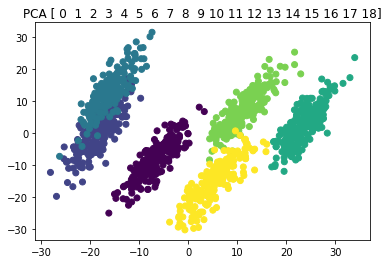

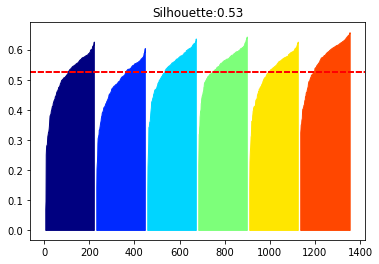

COV 0.9 


/tf/notebooks/discoverS_draft/scripts/data_generator.py:163: RuntimeWarning: covariance is not positive-semidefinite.
  arr = np.random.multivariate_normal(centers[cluster], d_covs[cluster], ns[cluster])


ARI  1.0, std 8


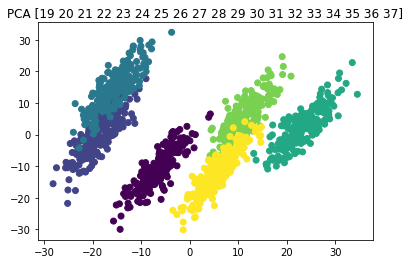

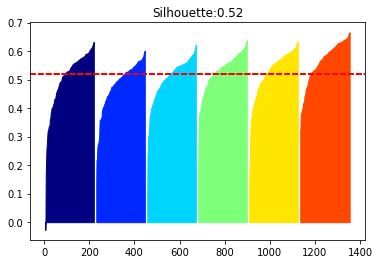

COV 0.9 


/tf/notebooks/discoverS_draft/scripts/data_generator.py:163: RuntimeWarning: covariance is not positive-semidefinite.
  arr = np.random.multivariate_normal(centers[cluster], d_covs[cluster], ns[cluster])


ARI  1.0, std 8


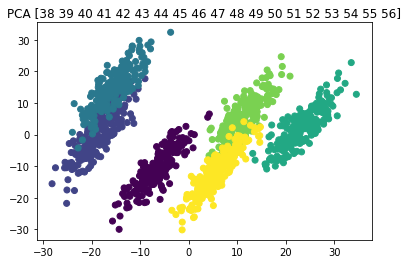

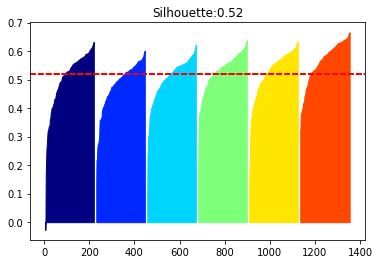

Total: (1300, 462), uniform (1300, 200) , normal (1300, 200),neg bin (1300, 0), gamma (1300, 0), moon (1300, 2), circle (1300, 2),  bimodal (1300, 0), redundat (1300, 5), outliers with uniform (1300, 0), outliers with normal (1300, 0) ,outlier binomial (1300, 0), beta features (1300, 0), 
*** Computing 1D feature ranking ...
Dispersion tests took 0.24 sec
Entropy computation 0.63 sec
KNN computation 0.01 sec
Sorting and thresholds 0.03 sec
Performing hierarchical clustering...
Hierarchical clustering 0.12 sec
Handle redundant features 0.04 sec
Returning 2 redundant features and  13 important features
*** Exploring 2D feature space with NN ...
handle_close_important (81, 3), total 816, 0.112968310713768
relevant_features 289 => computing 1691 
trimming 966 to 2
handle_important_features (83, 3),  total 1691, 0.112968310713768
irrelevant_features 171 => computing 496
handle_not_important_features (88, 3), total 496, 0.112968310713768
handle_all_features 460 => computing 1369


  0%|          | 0/21 [00:00<?, ?it/s]

handle_all_features (420, 3),  total 1369, 0.112968310713768
Returning (420, 3), explored a total of 4372 feature pairs
*** Optimization algorithm 
Non redundant features 460, orig size 462, nb imp : 13
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [00:43<03:09, 11.16s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[15, 34, 53]","[0, 3, 5, 5, 3, 5, 5, 5, 5, 0, 5, 5, 3, 5, 5, ...",0.157373,3.0,"Counter({5: 332, 1: 218, 4: 211, 0: 190, 3: 18..."


Selecting (7, 4) from archive


 38%|███▊      | 8/21 [01:34<02:26, 11.29s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[15, 34, 53]","[0, 3, 5, 5, 3, 5, 5, 5, 5, 0, 5, 5, 3, 5, 5, ...",0.157373,3.0,"Counter({5: 332, 1: 218, 4: 211, 0: 190, 3: 18..."
1,"[0, 19, 38]","[5, 1, 1, 5, 5, 1, 5, 5, 5, 5, 0, 5, 5, 1, 5, ...",0.156724,3.0,"Counter({4: 308, 1: 267, 0: 239, 3: 204, 5: 17..."


Selecting (9, 4) from archive


 57%|█████▋    | 12/21 [02:24<01:39, 11.04s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[15, 34, 53]","[0, 3, 5, 5, 3, 5, 5, 5, 5, 0, 5, 5, 3, 5, 5, ...",0.157373,3.0,"Counter({5: 332, 1: 218, 4: 211, 0: 190, 3: 18..."
1,"[0, 19, 38]","[5, 1, 1, 5, 5, 1, 5, 5, 5, 5, 0, 5, 5, 1, 5, ...",0.156724,3.0,"Counter({4: 308, 1: 267, 0: 239, 3: 204, 5: 17..."
2,"[7, 26, 45]","[4, 1, 1, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 1, ...",0.155184,3.0,"Counter({1: 367, 3: 292, 5: 218, 4: 185, 0: 13..."


Selecting (7, 4) from archive


 76%|███████▌  | 16/21 [03:08<00:49,  9.90s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[15, 34, 53]","[0, 3, 5, 5, 3, 5, 5, 5, 5, 0, 5, 5, 3, 5, 5, ...",0.157373,3.0,"Counter({5: 332, 1: 218, 4: 211, 0: 190, 3: 18..."
1,"[0, 19, 38]","[5, 1, 1, 5, 5, 1, 5, 5, 5, 5, 0, 5, 5, 1, 5, ...",0.156724,3.0,"Counter({4: 308, 1: 267, 0: 239, 3: 204, 5: 17..."
2,"[7, 26, 45]","[4, 1, 1, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 1, ...",0.155184,3.0,"Counter({1: 367, 3: 292, 5: 218, 4: 185, 0: 13..."
3,"[16, 35, 54]","[1, 5, 5, 1, 1, 1, 5, 5, 5, 1, 5, 1, 5, 1, 1, ...",0.155150,3.0,"Counter({4: 320, 5: 258, 3: 229, 2: 182, 0: 16..."


Selecting (8, 4) from archive


 95%|█████████▌| 20/21 [03:51<00:09,  9.41s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[15, 34, 53]","[0, 3, 5, 5, 3, 5, 5, 5, 5, 0, 5, 5, 3, 5, 5, ...",0.157373,3.0,"Counter({5: 332, 1: 218, 4: 211, 0: 190, 3: 18..."
1,"[0, 19, 38]","[5, 1, 1, 5, 5, 1, 5, 5, 5, 5, 0, 5, 5, 1, 5, ...",0.156724,3.0,"Counter({4: 308, 1: 267, 0: 239, 3: 204, 5: 17..."
2,"[7, 26, 45]","[4, 1, 1, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 1, ...",0.155184,3.0,"Counter({1: 367, 3: 292, 5: 218, 4: 185, 0: 13..."
3,"[16, 35, 54]","[1, 5, 5, 1, 1, 1, 5, 5, 5, 1, 5, 1, 5, 1, 1, ...",0.155150,3.0,"Counter({4: 320, 5: 258, 3: 229, 2: 182, 0: 16..."
4,"[13, 32, 51, 457]","[3, 4, 4, 3, 1, 3, 4, 3, 1, 4, 1, 4, 4, 3, 4, ...",0.156501,4.0,"Counter({4: 345, 5: 234, 0: 224, 2: 189, 3: 17..."


Selecting (9, 4) from archive


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 460, orig size 462, nb imp : 13
['ARCHIVE2D', 'CLOSE', 'IMP1D', 'RANDOM'] [50 25 15 10] [0.5, 0.25, 0.15, 0.1]
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [00:57<04:05, 14.45s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.123002,"[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",57.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."


Selecting (50, 4) from archive


 38%|███▊      | 8/21 [04:26<06:16, 28.95s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.123002,"[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",57.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."
1,0.102812,"[57, 139, 459]","[0, 5, 2, 4, 4, 0, 4, 0, 1, 5, 1, 1, 5, 2, 4, ...",3.0,"Counter({0: 247, 5: 235, 1: 227, 2: 199, 3: 19..."


Selecting (2, 4) from archive


 57%|█████▋    | 12/21 [05:17<02:20, 15.56s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.123002,"[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",57.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."
1,0.102812,"[57, 139, 459]","[0, 5, 2, 4, 4, 0, 4, 0, 1, 5, 1, 1, 5, 2, 4, ...",3.0,"Counter({0: 247, 5: 235, 1: 227, 2: 199, 3: 19..."
2,0.101050,"[63, 105, 461]","[5, 3, 4, 4, 2, 0, 1, 1, 4, 1, 5, 4, 3, 1, 4, ...",3.0,"Counter({0: 237, 4: 231, 5: 220, 3: 213, 1: 20..."


Selecting (1, 4) from archive


 76%|███████▌  | 16/21 [06:06<00:59, 11.93s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.123002,"[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",57.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."
1,0.102812,"[57, 139, 459]","[0, 5, 2, 4, 4, 0, 4, 0, 1, 5, 1, 1, 5, 2, 4, ...",3.0,"Counter({0: 247, 5: 235, 1: 227, 2: 199, 3: 19..."
2,0.101050,"[63, 105, 461]","[5, 3, 4, 4, 2, 0, 1, 1, 4, 1, 5, 4, 3, 1, 4, ...",3.0,"Counter({0: 237, 4: 231, 5: 220, 3: 213, 1: 20..."
3,0.084198,"[74, 79, 81]","[5, 0, 1, 5, 2, 0, 2, 5, 4, 4, 1, 2, 1, 2, 4, ...",3.0,"Counter({1: 296, 4: 220, 2: 205, 3: 197, 5: 19..."


Selecting (2, 4) from archive


 95%|█████████▌| 20/21 [06:39<00:08,  8.20s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.123002,"[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",57.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."
1,0.102812,"[57, 139, 459]","[0, 5, 2, 4, 4, 0, 4, 0, 1, 5, 1, 1, 5, 2, 4, ...",3.0,"Counter({0: 247, 5: 235, 1: 227, 2: 199, 3: 19..."
2,0.101050,"[63, 105, 461]","[5, 3, 4, 4, 2, 0, 1, 1, 4, 1, 5, 4, 3, 1, 4, ...",3.0,"Counter({0: 237, 4: 231, 5: 220, 3: 213, 1: 20..."
3,0.084198,"[74, 79, 81]","[5, 0, 1, 5, 2, 0, 2, 5, 4, 4, 1, 2, 1, 2, 4, ...",3.0,"Counter({1: 296, 4: 220, 2: 205, 3: 197, 5: 19..."
4,0.083014,"[69, 108, 153]","[5, 0, 1, 5, 2, 0, 4, 4, 4, 4, 4, 1, 2, 3, 3, ...",3.0,"Counter({0: 301, 4: 267, 2: 215, 3: 205, 1: 16..."


Selecting (12, 4) from archive


100%|██████████| 21/21 [06:53<00:00, 19.67s/it]


,adapted_ratkowsky_lance,features,partition,size,structure
0,0.123002,"[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",57.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."
1,0.102812,"[57, 139, 459]","[0, 5, 2, 4, 4, 0, 4, 0, 1, 5, 1, 1, 5, 2, 4, ...",3.0,"Counter({0: 247, 5: 235, 1: 227, 2: 199, 3: 19..."
2,0.101050,"[63, 105, 461]","[5, 3, 4, 4, 2, 0, 1, 1, 4, 1, 5, 4, 3, 1, 4, ...",3.0,"Counter({0: 237, 4: 231, 5: 220, 3: 213, 1: 20..."
3,0.084198,"[74, 79, 81]","[5, 0, 1, 5, 2, 0, 2, 5, 4, 4, 1, 2, 1, 2, 4, ...",3.0,"Counter({1: 296, 4: 220, 2: 205, 3: 197, 5: 19..."
4,0.083014,"[69, 108, 153]","[5, 0, 1, 5, 2, 0, 4, 4, 4, 4, 4, 1, 2, 3, 3, ...",3.0,"Counter({0: 301, 4: 267, 2: 215, 3: 205, 1: 16..."


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 460, orig size 462, nb imp : 13
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [01:00<04:24, 15.53s/it]

,features,partition,silhouette,size,structure
0,"[0, 1, 2, 3, 7, 8, 9, 10, 11, 13, 14, 15, 16, ...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.559751,36.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."


Selecting (47, 4) from archive


 38%|███▊      | 8/21 [02:24<03:40, 16.92s/it]

,features,partition,silhouette,size,structure
0,"[0, 1, 2, 3, 7, 8, 9, 10, 11, 13, 14, 15, 16, ...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.559751,36.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."
1,"[36, 55]","[1, 3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 0, ...",0.528648,2.0,"Counter({1: 382, 0: 341, 3: 227, 2: 148, 4: 12..."


Selecting (4, 4) from archive


 57%|█████▋    | 12/21 [03:22<02:07, 14.17s/it]

,features,partition,silhouette,size,structure
0,"[0, 1, 2, 3, 7, 8, 9, 10, 11, 13, 14, 15, 16, ...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.559751,36.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."
1,"[36, 55]","[1, 3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 0, ...",0.528648,2.0,"Counter({1: 382, 0: 341, 3: 227, 2: 148, 4: 12..."
2,"[25, 44]","[0, 3, 3, 3, 1, 3, 3, 3, 3, 0, 1, 3, 3, 0, 3, ...",0.522566,2.0,"Counter({1: 281, 4: 274, 0: 246, 3: 235, 2: 15..."


Selecting (3, 4) from archive


 76%|███████▌  | 16/21 [04:20<01:07, 13.48s/it]

,features,partition,silhouette,size,structure
0,"[0, 1, 2, 3, 7, 8, 9, 10, 11, 13, 14, 15, 16, ...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.559751,36.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."
1,"[36, 55]","[1, 3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 0, ...",0.528648,2.0,"Counter({1: 382, 0: 341, 3: 227, 2: 148, 4: 12..."
2,"[25, 44]","[0, 3, 3, 3, 1, 3, 3, 3, 3, 0, 1, 3, 3, 0, 3, ...",0.522566,2.0,"Counter({1: 281, 4: 274, 0: 246, 3: 235, 2: 15..."
3,"[31, 50]","[0, 3, 5, 5, 5, 5, 5, 5, 3, 5, 3, 0, 3, 5, 0, ...",0.521020,2.0,"Counter({5: 384, 3: 320, 0: 291, 1: 139, 4: 86..."


Selecting (5, 4) from archive


 95%|█████████▌| 20/21 [05:15<00:13, 13.05s/it]

,features,partition,silhouette,size,structure
0,"[0, 1, 2, 3, 7, 8, 9, 10, 11, 13, 14, 15, 16, ...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.559751,36.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."
1,"[36, 55]","[1, 3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 0, ...",0.528648,2.0,"Counter({1: 382, 0: 341, 3: 227, 2: 148, 4: 12..."
2,"[25, 44]","[0, 3, 3, 3, 1, 3, 3, 3, 3, 0, 1, 3, 3, 0, 3, ...",0.522566,2.0,"Counter({1: 281, 4: 274, 0: 246, 3: 235, 2: 15..."
3,"[31, 50]","[0, 3, 5, 5, 5, 5, 5, 5, 3, 5, 3, 0, 3, 5, 0, ...",0.521020,2.0,"Counter({5: 384, 3: 320, 0: 291, 1: 139, 4: 86..."
4,"[37, 56]","[3, 4, 4, 0, 0, 0, 0, 0, 4, 0, 4, 4, 4, 0, 3, ...",0.522056,2.0,"Counter({2: 280, 0: 272, 3: 237, 5: 222, 4: 14..."


Selecting (5, 4) from archive


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 460, orig size 462, nb imp : 13
Selecting (50, 4) from archive


 19%|█▉        | 4/21 [01:02<04:32, 16.03s/it]

,adapted_silhouette,features,partition,size,structure
0,0.515702,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 14, 15, 16,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",53.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."


Selecting (50, 4) from archive


 38%|███▊      | 8/21 [02:59<04:29, 20.76s/it]

,adapted_silhouette,features,partition,size,structure
0,0.515702,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 14, 15, 16,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",53.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."
1,0.280172,"[13, 69]","[4, 4, 4, 4, 2, 4, 2, 3, 3, 3, 3, 2, 2, 4, 4, ...",2.0,"Counter({1: 254, 4: 242, 3: 222, 0: 209, 5: 19..."


Selecting (6, 4) from archive


 57%|█████▋    | 12/21 [04:02<02:25, 16.15s/it]

,adapted_silhouette,features,partition,size,structure
0,0.515702,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 14, 15, 16,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",53.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."
1,0.280172,"[13, 69]","[4, 4, 4, 4, 2, 4, 2, 3, 3, 3, 3, 2, 2, 4, 4, ...",2.0,"Counter({1: 254, 4: 242, 3: 222, 0: 209, 5: 19..."
2,0.271070,"[107, 458]","[0, 4, 3, 1, 2, 0, 1, 2, 0, 2, 4, 1, 4, 1, 3, ...",2.0,"Counter({3: 254, 4: 237, 1: 237, 5: 194, 0: 19..."


Selecting (1, 4) from archive


 76%|███████▌  | 16/21 [05:00<01:09, 13.97s/it]

,adapted_silhouette,features,partition,size,structure
0,0.515702,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 14, 15, 16,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",53.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."
1,0.280172,"[13, 69]","[4, 4, 4, 4, 2, 4, 2, 3, 3, 3, 3, 2, 2, 4, 4, ...",2.0,"Counter({1: 254, 4: 242, 3: 222, 0: 209, 5: 19..."
2,0.271070,"[107, 458]","[0, 4, 3, 1, 2, 0, 1, 2, 0, 2, 4, 1, 4, 1, 3, ...",2.0,"Counter({3: 254, 4: 237, 1: 237, 5: 194, 0: 19..."
3,0.264510,"[12, 50, 181]","[4, 4, 1, 4, 5, 4, 4, 4, 0, 4, 1, 5, 5, 5, 1, ...",3.0,"Counter({1: 323, 5: 321, 4: 265, 0: 175, 3: 11..."


Selecting (8, 4) from archive


 95%|█████████▌| 20/21 [05:57<00:13, 13.49s/it]

,adapted_silhouette,features,partition,size,structure
0,0.515702,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 14, 15, 16,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",53.0,"Counter({2: 220, 5: 216, 0: 216, 3: 216, 1: 21..."
1,0.280172,"[13, 69]","[4, 4, 4, 4, 2, 4, 2, 3, 3, 3, 3, 2, 2, 4, 4, ...",2.0,"Counter({1: 254, 4: 242, 3: 222, 0: 209, 5: 19..."
2,0.271070,"[107, 458]","[0, 4, 3, 1, 2, 0, 1, 2, 0, 2, 4, 1, 4, 1, 3, ...",2.0,"Counter({3: 254, 4: 237, 1: 237, 5: 194, 0: 19..."
3,0.264510,"[12, 50, 181]","[4, 4, 1, 4, 5, 4, 4, 4, 0, 4, 1, 5, 5, 5, 1, ...",3.0,"Counter({1: 323, 5: 321, 4: 265, 0: 175, 3: 11..."
4,0.266675,"[57, 139, 459]","[0, 5, 2, 4, 4, 0, 4, 0, 1, 5, 1, 1, 5, 2, 4, ...",3.0,"Counter({0: 247, 5: 235, 1: 227, 2: 199, 3: 19..."


Selecting (1, 4) from archive


100%|██████████| 21/21 [06:25<00:00, 18.36s/it]


COV 0.9 


/tf/notebooks/discoverS_draft/scripts/data_generator.py:163: RuntimeWarning: covariance is not positive-semidefinite.
  arr = np.random.multivariate_normal(centers[cluster], d_covs[cluster], ns[cluster])


ARI  1.0, std 8


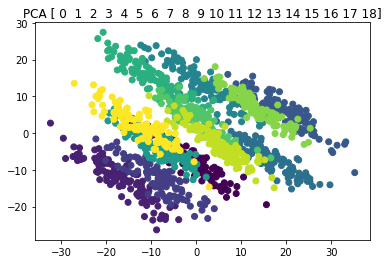

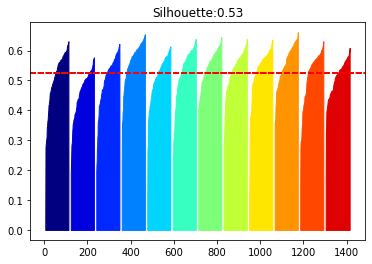

COV 0.9 


/tf/notebooks/discoverS_draft/scripts/data_generator.py:163: RuntimeWarning: covariance is not positive-semidefinite.
  arr = np.random.multivariate_normal(centers[cluster], d_covs[cluster], ns[cluster])


ARI  1.0, std 8


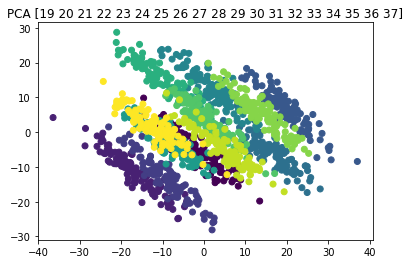

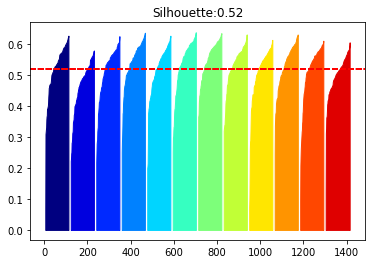

COV 0.9 


/tf/notebooks/discoverS_draft/scripts/data_generator.py:163: RuntimeWarning: covariance is not positive-semidefinite.
  arr = np.random.multivariate_normal(centers[cluster], d_covs[cluster], ns[cluster])


ARI  1.0, std 8


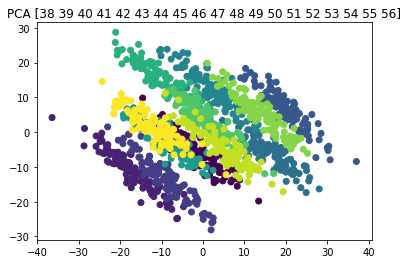

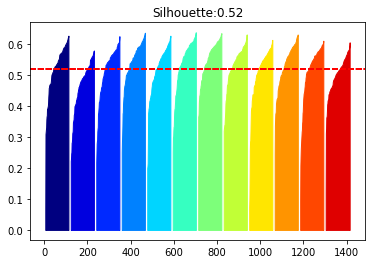

Total: (1300, 462), uniform (1300, 200) , normal (1300, 200),neg bin (1300, 0), gamma (1300, 0), moon (1300, 2), circle (1300, 2),  bimodal (1300, 0), redundat (1300, 5), outliers with uniform (1300, 0), outliers with normal (1300, 0) ,outlier binomial (1300, 0), beta features (1300, 0), 
*** Computing 1D feature ranking ...
Dispersion tests took 0.21 sec
Entropy computation 0.5 sec
KNN computation 0.01 sec
Sorting and thresholds 0.02 sec
Performing hierarchical clustering...
Hierarchical clustering 0.09 sec
Handle redundant features 0.02 sec
Returning 1 redundant features and  11 important features
*** Exploring 2D feature space with NN ...
handle_close_important (0, 3), total 809, nan
relevant_features 289 => computing 1691 
handle_important_features (0, 3),  total 1691, nan
irrelevant_features 172 => computing 506
handle_not_important_features (0, 3), total 506, nan
handle_all_features 461 => computing 1367


  0%|          | 0/21 [00:00<?, ?it/s]

handle_all_features (0, 3),  total 1367, nan
Returning (0, 3), explored a total of 4373 feature pairs
*** Optimization algorithm 
Non redundant features 461, orig size 462, nb imp : 11
adding 50 random population


 19%|█▉        | 4/21 [00:47<03:28, 12.27s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 2, 8, 13, 14, 16, 19, 27, 32, 35, 46, 51]","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.071705,12.0,"Counter({2: 216, 7: 112, 5: 108, 0: 108, 6: 10..."


adding 18 random population


 38%|███▊      | 8/21 [02:59<05:02, 23.24s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 2, 8, 13, 14, 16, 19, 27, 32, 35, 46, 51]","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.071705,12.0,"Counter({2: 216, 7: 112, 5: 108, 0: 108, 6: 10..."
1,"[6, 33, 38, 52]","[8, 5, 5, 8, 5, 8, 5, 8, 5, 5, 5, 5, 5, 8, 8, ...",0.074811,4.0,"Counter({9: 172, 1: 132, 7: 124, 8: 119, 4: 11..."


adding 11 random population


 57%|█████▋    | 12/21 [04:54<03:43, 24.86s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 2, 8, 13, 14, 16, 19, 27, 32, 35, 46, 51]","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.071705,12.0,"Counter({2: 216, 7: 112, 5: 108, 0: 108, 6: 10..."
1,"[6, 33, 38, 52]","[8, 5, 5, 8, 5, 8, 5, 8, 5, 5, 5, 5, 5, 8, 8, ...",0.074811,4.0,"Counter({9: 172, 1: 132, 7: 124, 8: 119, 4: 11..."
2,"[4, 17, 23, 36, 42, 55]","[1, 5, 7, 7, 5, 7, 7, 7, 5, 4, 5, 7, 5, 4, 4, ...",0.074026,6.0,"Counter({9: 183, 11: 154, 2: 149, 1: 134, 4: 1..."


adding 3 random population


 76%|███████▌  | 16/21 [07:17<02:21, 28.35s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 2, 8, 13, 14, 16, 19, 27, 32, 35, 46, 51]","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.071705,12.0,"Counter({2: 216, 7: 112, 5: 108, 0: 108, 6: 10..."
1,"[6, 33, 38, 52]","[8, 5, 5, 8, 5, 8, 5, 8, 5, 5, 5, 5, 5, 8, 8, ...",0.074811,4.0,"Counter({9: 172, 1: 132, 7: 124, 8: 119, 4: 11..."
2,"[4, 17, 23, 36, 42, 55]","[1, 5, 7, 7, 5, 7, 7, 7, 5, 4, 5, 7, 5, 4, 4, ...",0.074026,6.0,"Counter({9: 183, 11: 154, 2: 149, 1: 134, 4: 1..."
3,"[7, 10, 26, 45]","[7, 5, 2, 2, 5, 7, 2, 2, 5, 2, 5, 2, 5, 2, 2, ...",0.075195,4.0,"Counter({2: 218, 7: 183, 9: 164, 10: 154, 5: 1..."


adding 6 random population


 95%|█████████▌| 20/21 [09:11<00:26, 26.14s/it]

,features,partition,ratkowsky_lance,size,structure
0,"[0, 2, 8, 13, 14, 16, 19, 27, 32, 35, 46, 51]","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",0.071705,12.0,"Counter({2: 216, 7: 112, 5: 108, 0: 108, 6: 10..."
1,"[6, 33, 38, 52]","[8, 5, 5, 8, 5, 8, 5, 8, 5, 5, 5, 5, 5, 8, 8, ...",0.074811,4.0,"Counter({9: 172, 1: 132, 7: 124, 8: 119, 4: 11..."
2,"[4, 17, 23, 36, 42, 55]","[1, 5, 7, 7, 5, 7, 7, 7, 5, 4, 5, 7, 5, 4, 4, ...",0.074026,6.0,"Counter({9: 183, 11: 154, 2: 149, 1: 134, 4: 1..."
3,"[7, 10, 26, 45]","[7, 5, 2, 2, 5, 7, 2, 2, 5, 2, 5, 2, 5, 2, 2, ...",0.075195,4.0,"Counter({2: 218, 7: 183, 9: 164, 10: 154, 5: 1..."
4,"[12, 29, 31, 48, 50]","[7, 6, 5, 5, 5, 10, 5, 5, 6, 5, 6, 5, 6, 5, 5,...",0.074061,5.0,"Counter({1: 164, 10: 158, 6: 145, 5: 121, 3: 1..."


adding 4 random population


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 461, orig size 462, nb imp : 11
['ARCHIVE2D', 'CLOSE', 'IMP1D', 'RANDOM'] [50 25 15 10] [0.5, 0.25, 0.15, 0.1]
adding 50 random population


 19%|█▉        | 4/21 [01:34<06:51, 24.20s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.057225,"[0, 1, 2, 3, 4, 5, 6, 8, 13, 14, 17, 19, 20, 2...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",36.0,"Counter({6: 112, 10: 108, 5: 108, 0: 108, 9: 1..."


adding 44 random population


 38%|███▊      | 8/21 [06:06<09:02, 41.70s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.057225,"[0, 1, 2, 3, 4, 5, 6, 8, 13, 14, 17, 19, 20, 2...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",36.0,"Counter({6: 112, 10: 108, 5: 108, 0: 108, 9: 1..."
1,0.050192,"[7, 9, 10, 12, 15, 16, 18, 24, 25, 26, 31, 35,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",27.0,"Counter({6: 112, 5: 108, 9: 108, 0: 108, 4: 10..."


adding 10 random population


 57%|█████▋    | 12/21 [10:19<06:05, 40.61s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.057225,"[0, 1, 2, 3, 4, 5, 6, 8, 13, 14, 17, 19, 20, 2...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",36.0,"Counter({6: 112, 10: 108, 5: 108, 0: 108, 9: 1..."
1,0.050192,"[7, 9, 10, 12, 15, 16, 18, 24, 25, 26, 31, 35,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",27.0,"Counter({6: 112, 5: 108, 9: 108, 0: 108, 4: 10..."
2,0.045348,"[57, 66, 106, 108, 461]","[2, 6, 4, 5, 7, 2, 8, 5, 10, 2, 5, 6, 6, 7, 3,...",5.0,"Counter({2: 153, 6: 125, 7: 125, 11: 117, 0: 1..."


adding 1 random population


 76%|███████▌  | 16/21 [11:33<01:48, 21.63s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.057225,"[0, 1, 2, 3, 4, 5, 6, 8, 13, 14, 17, 19, 20, 2...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",36.0,"Counter({6: 112, 10: 108, 5: 108, 0: 108, 9: 1..."
1,0.050192,"[7, 9, 10, 12, 15, 16, 18, 24, 25, 26, 31, 35,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",27.0,"Counter({6: 112, 5: 108, 9: 108, 0: 108, 4: 10..."
2,0.045348,"[57, 66, 106, 108, 461]","[2, 6, 4, 5, 7, 2, 8, 5, 10, 2, 5, 6, 6, 7, 3,...",5.0,"Counter({2: 153, 6: 125, 7: 125, 11: 117, 0: 1..."
3,0.044041,"[34, 65, 73, 99]","[8, 4, 9, 10, 2, 8, 4, 4, 2, 2, 11, 2, 4, 11, ...",4.0,"Counter({2: 139, 8: 138, 9: 136, 11: 118, 1: 1..."


adding 3 random population


 95%|█████████▌| 20/21 [12:42<00:16, 16.71s/it]

,adapted_ratkowsky_lance,features,partition,size,structure
0,0.057225,"[0, 1, 2, 3, 4, 5, 6, 8, 13, 14, 17, 19, 20, 2...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",36.0,"Counter({6: 112, 10: 108, 5: 108, 0: 108, 9: 1..."
1,0.050192,"[7, 9, 10, 12, 15, 16, 18, 24, 25, 26, 31, 35,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",27.0,"Counter({6: 112, 5: 108, 9: 108, 0: 108, 4: 10..."
2,0.045348,"[57, 66, 106, 108, 461]","[2, 6, 4, 5, 7, 2, 8, 5, 10, 2, 5, 6, 6, 7, 3,...",5.0,"Counter({2: 153, 6: 125, 7: 125, 11: 117, 0: 1..."
3,0.044041,"[34, 65, 73, 99]","[8, 4, 9, 10, 2, 8, 4, 4, 2, 2, 11, 2, 4, 11, ...",4.0,"Counter({2: 139, 8: 138, 9: 136, 11: 118, 1: 1..."
4,0.046027,"[74, 80, 87, 133, 459]","[11, 8, 10, 0, 0, 7, 1, 5, 8, 1, 0, 8, 3, 7, 4...",5.0,"Counter({4: 146, 1: 144, 3: 129, 8: 118, 10: 1..."


adding 2 random population


100%|██████████| 21/21 [13:14<00:00, 37.84s/it]


,adapted_ratkowsky_lance,features,partition,size,structure
0,0.057225,"[0, 1, 2, 3, 4, 5, 6, 8, 13, 14, 17, 19, 20, 2...","[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",36.0,"Counter({6: 112, 10: 108, 5: 108, 0: 108, 9: 1..."
1,0.050192,"[7, 9, 10, 12, 15, 16, 18, 24, 25, 26, 31, 35,...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...",27.0,"Counter({6: 112, 5: 108, 9: 108, 0: 108, 4: 10..."
2,0.045348,"[57, 66, 106, 108, 461]","[2, 6, 4, 5, 7, 2, 8, 5, 10, 2, 5, 6, 6, 7, 3,...",5.0,"Counter({2: 153, 6: 125, 7: 125, 11: 117, 0: 1..."
3,0.044041,"[34, 65, 73, 99]","[8, 4, 9, 10, 2, 8, 4, 4, 2, 2, 11, 2, 4, 11, ...",4.0,"Counter({2: 139, 8: 138, 9: 136, 11: 118, 1: 1..."
4,0.046027,"[74, 80, 87, 133, 459]","[11, 8, 10, 0, 0, 7, 1, 5, 8, 1, 0, 8, 3, 7, 4...",5.0,"Counter({4: 146, 1: 144, 3: 129, 8: 118, 10: 1..."


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 461, orig size 462, nb imp : 11
adding 50 random population


 19%|█▉        | 4/21 [01:24<06:09, 21.75s/it]

,features,partition,silhouette,size,structure
0,"[151, 174]","[5, 9, 5, 1, 2, 2, 9, 5, 9, 8, 2, 1, 10, 8, 3,...",0.355316,2.0,"Counter({1: 153, 11: 126, 5: 115, 7: 114, 8: 1..."


adding 1 random population


 38%|███▊      | 8/21 [02:54<04:31, 20.89s/it]

,features,partition,silhouette,size,structure
0,"[151, 174]","[5, 9, 5, 1, 2, 2, 9, 5, 9, 8, 2, 1, 10, 8, 3,...",0.355316,2.0,"Counter({1: 153, 11: 126, 5: 115, 7: 114, 8: 1..."
1,"[23, 42]","[7, 10, 7, 1, 10, 1, 7, 5, 5, 1, 5, 7, 5, 7, 5...",0.542021,2.0,"Counter({10: 153, 4: 152, 11: 152, 1: 147, 7: ..."


adding 2 random population


 57%|█████▋    | 12/21 [04:22<03:07, 20.88s/it]

,features,partition,silhouette,size,structure
0,"[151, 174]","[5, 9, 5, 1, 2, 2, 9, 5, 9, 8, 2, 1, 10, 8, 3,...",0.355316,2.0,"Counter({1: 153, 11: 126, 5: 115, 7: 114, 8: 1..."
1,"[23, 42]","[7, 10, 7, 1, 10, 1, 7, 5, 5, 1, 5, 7, 5, 7, 5...",0.542021,2.0,"Counter({10: 153, 4: 152, 11: 152, 1: 147, 7: ..."
2,"[218, 225]","[10, 3, 7, 11, 5, 4, 5, 11, 5, 9, 5, 2, 1, 11,...",0.363055,2.0,"Counter({3: 129, 1: 127, 10: 124, 2: 120, 11: ..."


adding 4 random population


 76%|███████▌  | 16/21 [05:50<01:41, 20.39s/it]

,features,partition,silhouette,size,structure
0,"[151, 174]","[5, 9, 5, 1, 2, 2, 9, 5, 9, 8, 2, 1, 10, 8, 3,...",0.355316,2.0,"Counter({1: 153, 11: 126, 5: 115, 7: 114, 8: 1..."
1,"[23, 42]","[7, 10, 7, 1, 10, 1, 7, 5, 5, 1, 5, 7, 5, 7, 5...",0.542021,2.0,"Counter({10: 153, 4: 152, 11: 152, 1: 147, 7: ..."
2,"[218, 225]","[10, 3, 7, 11, 5, 4, 5, 11, 5, 9, 5, 2, 1, 11,...",0.363055,2.0,"Counter({3: 129, 1: 127, 10: 124, 2: 120, 11: ..."
3,"[14, 102]","[7, 2, 2, 10, 10, 10, 10, 10, 7, 5, 10, 5, 5, ...",0.360875,2.0,"Counter({3: 152, 1: 125, 6: 124, 8: 119, 4: 11..."


adding 4 random population


 95%|█████████▌| 20/21 [07:18<00:20, 20.33s/it]

,features,partition,silhouette,size,structure
0,"[151, 174]","[5, 9, 5, 1, 2, 2, 9, 5, 9, 8, 2, 1, 10, 8, 3,...",0.355316,2.0,"Counter({1: 153, 11: 126, 5: 115, 7: 114, 8: 1..."
1,"[23, 42]","[7, 10, 7, 1, 10, 1, 7, 5, 5, 1, 5, 7, 5, 7, 5...",0.542021,2.0,"Counter({10: 153, 4: 152, 11: 152, 1: 147, 7: ..."
2,"[218, 225]","[10, 3, 7, 11, 5, 4, 5, 11, 5, 9, 5, 2, 1, 11,...",0.363055,2.0,"Counter({3: 129, 1: 127, 10: 124, 2: 120, 11: ..."
3,"[14, 102]","[7, 2, 2, 10, 10, 10, 10, 10, 7, 5, 10, 5, 5, ...",0.360875,2.0,"Counter({3: 152, 1: 125, 6: 124, 8: 119, 4: 11..."
4,"[32, 51]","[3, 7, 7, 7, 7, 3, 7, 7, 7, 7, 1, 3, 1, 3, 7, ...",0.544823,2.0,"Counter({4: 176, 1: 139, 3: 138, 11: 138, 0: 1..."


adding 1 random population


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 461, orig size 462, nb imp : 11
adding 50 random population


 19%|█▉        | 4/21 [01:40<07:15, 25.62s/it]

,adapted_silhouette,features,partition,size,structure
0,0.349086,"[29, 48]","[7, 7, 7, 7, 7, 9, 7, 4, 4, 1, 2, 4, 4, 7, 7, ...",2.0,"Counter({7: 157, 1: 141, 11: 132, 4: 121, 10: ..."


adding 1 random population


 38%|███▊      | 8/21 [03:43<06:13, 28.69s/it]

,adapted_silhouette,features,partition,size,structure
0,0.349086,"[29, 48]","[7, 7, 7, 7, 7, 9, 7, 4, 4, 1, 2, 4, 4, 7, 7, ...",2.0,"Counter({7: 157, 1: 141, 11: 132, 4: 121, 10: ..."
1,0.440472,"[0, 2, 7, 8, 12, 15, 17, 19, 21, 22, 26, 33, 3...","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...",20.0,"Counter({6: 112, 7: 108, 10: 108, 0: 108, 1: 1..."


adding 49 random population


 57%|█████▋    | 12/21 [06:27<04:50, 32.32s/it]

,adapted_silhouette,features,partition,size,structure
0,0.349086,"[29, 48]","[7, 7, 7, 7, 7, 9, 7, 4, 4, 1, 2, 4, 4, 7, 7, ...",2.0,"Counter({7: 157, 1: 141, 11: 132, 4: 121, 10: ..."
1,0.440472,"[0, 2, 7, 8, 12, 15, 17, 19, 21, 22, 26, 33, 3...","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...",20.0,"Counter({6: 112, 7: 108, 10: 108, 0: 108, 1: 1..."
2,0.344840,"[31, 50]","[9, 5, 5, 10, 10, 9, 0, 9, 5, 5, 1, 5, 5, 10, ...",2.0,"Counter({1: 168, 5: 167, 10: 143, 9: 121, 0: 1..."


adding 2 random population


 76%|███████▌  | 16/21 [08:18<02:20, 28.12s/it]

,adapted_silhouette,features,partition,size,structure
0,0.349086,"[29, 48]","[7, 7, 7, 7, 7, 9, 7, 4, 4, 1, 2, 4, 4, 7, 7, ...",2.0,"Counter({7: 157, 1: 141, 11: 132, 4: 121, 10: ..."
1,0.440472,"[0, 2, 7, 8, 12, 15, 17, 19, 21, 22, 26, 33, 3...","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...",20.0,"Counter({6: 112, 7: 108, 10: 108, 0: 108, 1: 1..."
2,0.344840,"[31, 50]","[9, 5, 5, 10, 10, 9, 0, 9, 5, 5, 1, 5, 5, 10, ...",2.0,"Counter({1: 168, 5: 167, 10: 143, 9: 121, 0: 1..."
3,0.239188,"[117, 133]","[4, 3, 5, 0, 4, 6, 7, 3, 3, 2, 0, 4, 7, 4, 8, ...",2.0,"Counter({10: 144, 4: 134, 11: 133, 5: 124, 6: ..."


adding 4 random population


 95%|█████████▌| 20/21 [10:10<00:26, 26.25s/it]

,adapted_silhouette,features,partition,size,structure
0,0.349086,"[29, 48]","[7, 7, 7, 7, 7, 9, 7, 4, 4, 1, 2, 4, 4, 7, 7, ...",2.0,"Counter({7: 157, 1: 141, 11: 132, 4: 121, 10: ..."
1,0.440472,"[0, 2, 7, 8, 12, 15, 17, 19, 21, 22, 26, 33, 3...","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...",20.0,"Counter({6: 112, 7: 108, 10: 108, 0: 108, 1: 1..."
2,0.344840,"[31, 50]","[9, 5, 5, 10, 10, 9, 0, 9, 5, 5, 1, 5, 5, 10, ...",2.0,"Counter({1: 168, 5: 167, 10: 143, 9: 121, 0: 1..."
3,0.239188,"[117, 133]","[4, 3, 5, 0, 4, 6, 7, 3, 3, 2, 0, 4, 7, 4, 8, ...",2.0,"Counter({10: 144, 4: 134, 11: 133, 5: 124, 6: ..."
4,0.358062,"[37, 56]","[5, 10, 10, 2, 2, 5, 5, 5, 2, 2, 2, 6, 2, 10, ...",2.0,"Counter({0: 142, 3: 136, 8: 133, 5: 127, 10: 1..."


adding 2 random population


100%|██████████| 21/21 [10:48<00:00, 30.89s/it]


In [2]:

for std in [2, 5, 8]:
    print(f">> std {std}")
    n_clusters_per_subpace = [3,6,12]
    cluster_std = None
    n_uniform_features=700
    n_normal_features=700
    n_neg_binomial = 700
    n_gamma = 500
    n_redundant_clusters = 0
    n_redundant_cluster_size = 0
    for n_clusters in np.unique(n_clusters_per_subpace): 

        n_redundant_clusters = 0
        n_redundant_cluster_size = 0
        data, best_subspaces, truths = data_generator.make_data_for_ga(
                         [n_clusters, n_clusters, n_clusters],
                         cluster_std=[std, std,std],
                         n_uniform_features=200,
                         n_normal_features=200,
                         n_neg_binomial=0,
                         n_gamma=0,
                         n_beta=0,
                         random_redundant=True,
                         n_redundant=5,
                         n_outlier_features=0,
                         n_cutoff=0,
                         n_bimodal_features=0,
                         min_subspace_features=19,
                         max_subspace_features=20,
                         max_neg_bin_p = 0.3,
                         n_samples=1300,
                         plot=True,
                         isotropic = False)

        imp_f = np.concatenate(best_subspaces)
        data.shape, imp_f, best_subspaces

        truth = None

        clustering ="gmm"

        meta_features = feature_ranking.rank_features(data,
                                                      nb_bins=20,
                                                      rank_threshold=90,
                                                      z_file=None,
                                                      metric='euclidean',
                                                      redundant_threshold=0.4)
    
        model_file = f'../models/gmm_arl.h5' 
        population2, n = features_2d.run(
            data,
            n_clusters,
            meta_features,
            model_file=model_file,
            add_close_population=False,
            theta=0.09,
        )

        globalResults = {}

        ############## ratkowsky_lance #######################
        method = "ratkowsky_lance"
        threshold=0.09
        score_tolerance=0.009
        round_size = 4
        debug = False
        ignore_redundant= True
        epochs = 5*round_size


        sampling = {
            "ARCHIVE2D": { 
                "ga": 0.5,
                "max": 0.5 },
            "CLOSE": { 
                "ga": 0.25,
                "max": 0.25 },
            "IMP1D": { 
                "ga": 0.15,
                "max": 0.15 },
            "RANDOM": { 
                "ga": 0.1,
                "max": 0.1},
        }
        params = ga.ga_parameters(
            n_clusters,
            data.shape[1],
            truth,
            meta_features,
            method=method,
            truth_methods=['ari'],
            archive_2d=population2.iloc[:1000],
            debug=debug,
            epochs=epochs,
            round_size=round_size,
            sampling = sampling,
            ignore_redundant = ignore_redundant,
            allow_subspace_overlap = False,
            improvement_per_mutation_report = True,
            score_tolerance=score_tolerance,
            clustering = clustering,
            total_maximisation_exploration = 100

        )
        solutions, archive= ga.run(data, params)
        globalResults[f"{clustering}_{method}_{n_clusters}_pop2"] = solutions
        
        ############## adapted_ratkowsky_lance #######################
        method = "adapted_ratkowsky_lance"
        threshold=0.09
        score_tolerance=0.009
        round_size = 4
        debug = False
        ignore_redundant= True
        epochs = 5*round_size


        sampling = {
            "ARCHIVE2D": { 
                "ga": 0.5,
                "max": 0.5 },
            "CLOSE": { 
                "ga": 0.25,
                "max": 0.25 },
            "IMP1D": { 
                "ga": 0.15,
                "max": 0.15 },
            "RANDOM": { 
                "ga": 0.1,
                "max": 0.1},
        }
        params = ga.ga_parameters(
            n_clusters,
            data.shape[1],
            truth,
            meta_features,
            method=method,
            truth_methods=['ari'],
            archive_2d=population2.iloc[:1000],
            debug=debug,
            epochs=epochs,
            round_size=round_size,
            sampling = sampling,
            ignore_redundant = ignore_redundant,
            allow_subspace_overlap = False,
            improvement_per_mutation_report = True,
            score_tolerance=score_tolerance,
            clustering = clustering,
            total_maximisation_exploration = 100

        )
        print(params["sampling_actions"], params["maximisation_sizes"] , params["sampling_prob"])
        params

        solutions, archive= ga.run(data, params)
        display(solutions)
        globalResults[f"{clustering}_{method}_{n_clusters}_pop2"] = solutions

        ############## silhouette #######################
        method = "silhouette"
        threshold=0.1
        score_tolerance=0.01
        round_size = 4
        debug = False
        ignore_redundant= True
        epochs = 5*round_size


        sampling = {
            "ARCHIVE2D": { 
                "ga": 0.5,
                "max": 0.5 },
            "CLOSE": { 
                "ga": 0.25,
                "max": 0.25 },
            "IMP1D": { 
                "ga": 0.15,
                "max": 0.15 },
            "RANDOM": { 
                "ga": 0.1,
                "max": 0.1},
        }
        params = ga.ga_parameters(
            n_clusters,
            data.shape[1],
            truth,
            meta_features,
            method=method,
            truth_methods=['ari'],
            archive_2d=population2.iloc[:1000],
            debug=debug,
            epochs=epochs,
            round_size=round_size,
            sampling = sampling,
            ignore_redundant = ignore_redundant,
            allow_subspace_overlap = False,
            improvement_per_mutation_report = True,
            score_tolerance=score_tolerance,
            clustering = clustering,
            total_maximisation_exploration = 100

        )

        solutions, archive= ga.run(data, params)
        globalResults[f"{clustering}_{method}_{n_clusters}_pop3"] = solutions

        ############## adapted_silhouette #######################
        method = "adapted_silhouette"
        threshold=0.1
        score_tolerance=0.01
        round_size = 4
        debug = False
        ignore_redundant= True
        epochs = 5*round_size


        sampling = {
            "ARCHIVE2D": { 
                "ga": 0.5,
                "max": 0.5 },
            "CLOSE": { 
                "ga": 0.25,
                "max": 0.25 },
            "IMP1D": { 
                "ga": 0.15,
                "max": 0.15 },
            "RANDOM": { 
                "ga": 0.1,
                "max": 0.1},
        }
        params = ga.ga_parameters(
            n_clusters,
            data.shape[1],
            truth,
            meta_features,
            method=method,
            truth_methods=['ari'],
            archive_2d=population2.iloc[:1000],
            debug=debug,
            epochs=epochs,
            round_size=round_size,
            sampling = sampling,
            ignore_redundant = ignore_redundant,
            allow_subspace_overlap = False,
            improvement_per_mutation_report = True,
            score_tolerance=score_tolerance,
            clustering = clustering,
            total_maximisation_exploration = 100

        )

        solutions, archive= ga.run(data, params)
        globalResults[f"{clustering}_{method}_{n_clusters}_pop3"] = solutions
        eval_df = ga_evaluation.evaluate_ga_result(globalResults, best_subspaces, truths)
        eval_df.to_pickle(f"../data/GA/nonisotropic_GA_gmm_{std}_{n_clusters}.pkl")

In [3]:
df = None
n_clusters_per_subpace = [3,6,12]
# for std in [0.5, 1, 1.5, 2, 3, 4]:
for std in [2,5, 8]:
    for n_clusters in n_clusters_per_subpace:
        eval_df = pd.read_pickle(f"../data/GA/nonisotropic_GA_gmm_{std}_{n_clusters}.pkl")
    #     eval_df = pd.read_pickle(f"../data/GA/GA_hdbscan_{std}_20000.pkl")
        eval_df["std"] = std
        if df is None:
            df = eval_df
        else:
            df = pd.concat([df, eval_df])

In [4]:
df.experiment.unique()

array(['gmm_ratkowsky_lance_3_pop2', 'gmm_adapted_ratkowsky_lance_3_pop2',
       'gmm_silhouette_3_pop3', 'gmm_adapted_silhouette_3_pop3',
       'gmm_ratkowsky_lance_6_pop2', 'gmm_adapted_ratkowsky_lance_6_pop2',
       'gmm_silhouette_6_pop3', 'gmm_adapted_silhouette_6_pop3',
       'gmm_ratkowsky_lance_12_pop2',
       'gmm_adapted_ratkowsky_lance_12_pop2', 'gmm_silhouette_12_pop3',
       'gmm_adapted_silhouette_12_pop3'], dtype=object)

In [5]:


columns={
            'Adapted Ratkowsky Lance': "Penalized\nRatkowski Lance",
            'Adapted Silhouette': "Penalized\nSilhouette",
            
        }
df["experiment"] = df["experiment"].apply(
    lambda l: " ".join(x.title() for x in l.split("_")[1:-2]))

df = df.rename(columns = {"ari": "ARI", "identified_features": "% Identified Features",
                         'true_nb_clust' : "Nb Clusters"})
df = df.sort_values(by = "experiment")
# df["experiment"] = df["experiment"].apply(lambda x: columns.get(x, x))

In [6]:
df["experiment"] = df["experiment"].apply(lambda x: columns[x] if x in columns else x)

In [7]:
df.groupby("experiment").mean()[["% Identified Features", "ARI"]].T

experiment,Penalized\nRatkowski Lance,Penalized\nSilhouette,Ratkowsky Lance,Silhouette
% Identified Features,0.77193,0.707602,0.223436,0.368421
ARI,1.00000,1.000000,0.677487,0.871907


In [8]:
df.groupby("experiment").mean()[["% Identified Features", "ARI"]].T.mean()

experiment
Penalized\nRatkowski Lance    0.885965
Penalized\nSilhouette         0.853801
Ratkowsky Lance               0.450461
Silhouette                    0.620164
dtype: float64

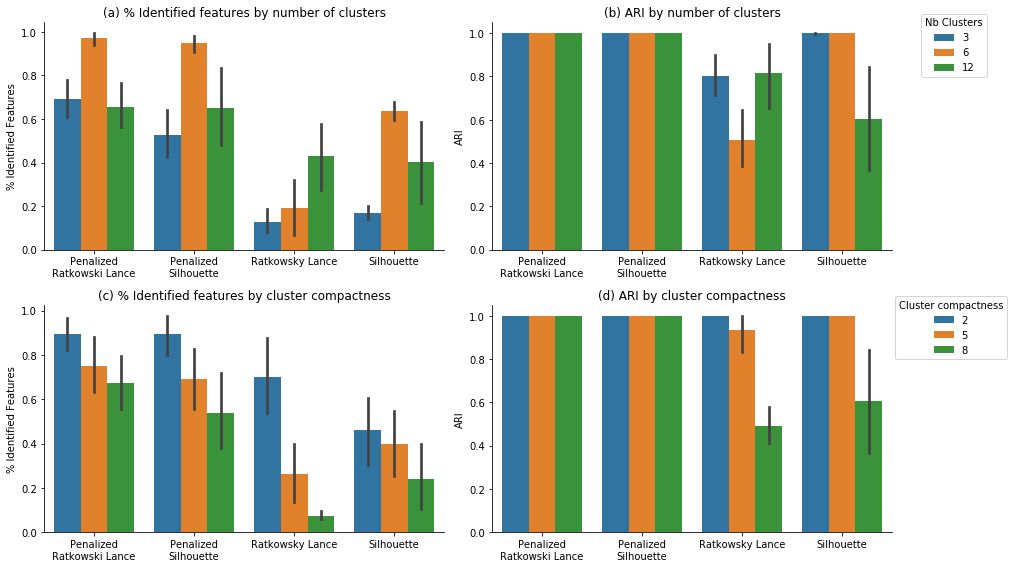

In [10]:
plt.figure(figsize = (14, 8 ))
ax = plt.subplot(221)
g = sns.barplot(x = "experiment" , y = "% Identified Features", data = df, hue = "Nb Clusters", ax = ax)
g.legend_.remove()
plt.title("(a) % Identified features by number of clusters")
plt.xlabel("")
sns.despine()

ax = plt.subplot(222)
g = sns.barplot(x = "experiment" , y = "ARI", data = df, hue = "Nb Clusters", ax = ax)
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.9), ncol=1, title = "Nb Clusters")
plt.xlabel("")
plt.title("(b) ARI by number of clusters")
sns.despine()


ax = plt.subplot(223)
g = sns.barplot(x = "experiment" , y = "% Identified Features", data = df, hue = "std", ax = ax)
g.legend_.remove()
plt.xlabel("")
plt.title("(c) % Identified features by cluster compactness")
sns.despine()

ax = plt.subplot(224)
g = sns.barplot(x = "experiment" , y = "ARI", data = df, hue = "std", ax = ax)
g.legend(loc='center right', bbox_to_anchor=(1.3, 0.9), ncol=1, title = "Cluster compactness")
plt.xlabel("")
plt.title("(d) ARI by cluster compactness")
sns.despine()
plt.tight_layout()
plt.savefig(f"images/GMM_subspace_clustering.pdf", bbox_inches='tight')

In [ ]:
plt.figure(figsize = (10, 10 ))
ax = plt.subplot(311)
g = df.groupby("experiment").mean()[["% Identified Features", "ARI"]].T.plot(kind = "bar", ax = ax)
plt.title("(a) Mean values")
plt.xticks(rotation =0 )
sns.despine()
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.9), ncol=1)


ax = plt.subplot(312)
g = df.groupby(
    ["experiment", "std"]).mean()["% Identified Features"].unstack(1).T.plot(kind="bar", ax = ax)
plt.xticks(rotation =0 )
sns.despine()
g.legend_.remove()
plt.title("(b)% Identified Features by cluster std")
plt.xlabel("Clusters standard deviation")
plt.ylabel("% Identified Features")

ax = plt.subplot(313)
g = df.groupby(
    ["experiment", "std"]).mean()["ARI"].unstack(1).T.plot(kind="bar", ax = ax)
sns.despine()
plt.title("(c) ARI by cluster std")
plt.xlabel("Clusters standard deviation")
plt.ylabel("ARI")

plt.xticks(rotation =0 )
g.legend_.remove()
plt.tight_layout()
# plt.savefig(f"images/ARI_features_internal_scores_small_dataset_GMM.pdf", bbox_inches='tight')